In [13]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import statsmodels.api as sm
plt.rcParams['figure.dpi'] = 227

gain = lambda x: x if x > 0 else 0
loss = lambda x: abs(x) if x < 0 else 0

def display_predictions():
    pass

def bollinger_bands(stock, std=2):    
    
    # Bollinger band plot with EMA and original historical data
    plt.figure(figsize=(16,5))
    plt.style.use('seaborn-whitegrid')
    plt.plot(stock.index, stock.Close, color='#3388cf', label='Price')
    plt.plot(stock.index, stock.MA21, color='#ad6eff', label='Moving Average (21 days)')
    #plt.plot(stock.index, stock.MA7, color='#ff6e9d', label='Moving Average (7 days)')
    plt.plot(stock.index, stock.Upper_band, color='#ffbd74', alpha=0.3)
    plt.plot(stock.index, stock.Lower_band, color='#ffa33f', alpha=0.3)
    plt.fill_between(stock.index, stock.Upper_band, stock.Lower_band, color='#ffa33f', alpha=0.1, label='Bollinger Band ({} STD)'.format(std))
    plt.legend(frameon=True, loc=1, ncol=1, fontsize=10, borderpad=.6)
    plt.title('Bollinger Bands', fontSize=15)
    plt.ylabel('Price', fontSize=12)
    plt.xlim([stock.index.min(), stock.index.max()])
    plt.show()

def volume(stock):
    # Volume plot
    plt.figure(figsize=(16,2))
    plt.style.use('seaborn-whitegrid')
    plt.title('Volume', fontSize=15)
    plt.ylabel('Volume', fontSize=12)
    plt.plot(stock.index, stock['Volume'].ewm(21).mean())
    plt.xlim([stock.index.min(), stock.index.max()])
    plt.show()    

def macd(stock):
    # MACD
    plt.figure(figsize=(16,2))
    plt.plot(stock.MACD, label='MACD', color = '#b278ff')
    plt.plot(stock.Signal, label='Signal', color='#ffa74a')
    plt.axhline(0, color='#557692')
    plt.legend(frameon=True, loc=1, ncol=1, fontsize=10, borderpad=.6)
    plt.title('MACD', fontSize=15)
    plt.ylabel('Strength', fontSize=12)
    plt.show()    

def rsi(stock):
    # RSI
    plt.figure(figsize=(16,2)) 
    plt.plot(stock.index, stock.RSI, color='#ad6eff')
    plt.xlim([stock.index.min(), stock.index.max()])
    plt.axhline(20, color='#f9989c')
    plt.axhline(80, color='#60e8ad')
    plt.title('RSI', fontSize=15)
    plt.ylabel('%', fontSize=12)
    plt.ylim([0, 100])
    plt.show()
    
def hist(data, name, bins=50):
    plt.rcParams['figure.dpi'] = 227
    plt.figure(figsize=(16,6))
    plt.style.use('seaborn-whitegrid')
    plt.hist(data, bins=bins)
    plt.title(name, fontSize=16)
    plt.xlabel('Values', fontSize=13)
    plt.ylabel('Quantities', fontSize=13)
    plt.show()
    
def qqplot(data):
    plt.rcParams['figure.dpi'] = 227
    plt.figure(figsize=(16,6))
    plt.style.use('seaborn-whitegrid')
    sm.qqplot(data.dropna(), line='s', scale=1)
    plt.title('Check for Normality', fontSize=16)
    plt.show()
    
def compare_stocks(stocks, value='Close', by='month', scatter=False):
    '''
    Function groups stocks' Close values
    '''
    plt.rcParams['figure.dpi'] = 227
    plt.figure(figsize=(16,6))
    plt.style.use('seaborn-whitegrid')
    group_by_stock = {}
    
    for stock in list(stocks.keys()): 
        
        if by == 'month': group_by = stocks[stock].index.month
        if by == 'day': group_by = stocks[stock].index.day
        if by == 'year': group_by = stocks[stock].index.year
        
        a = stocks[stock].groupby(group_by).mean()[value]
        normalized_price = (a-a.mean())/a.std()
        group_by_stock[stock] = normalized_price
        
        if scatter == False:
            plt.plot(normalized_price, label=stock)
        else:
            plt.scatter(normalized_price.keys(), normalized_price.values, label=stock)       
    
    plt.plot(pd.DataFrame(group_by_stock).mean(axis=1), label='ALL', color='black', linewidth=5, linestyle='--')    
    plt.legend(frameon=True, fancybox=True, framealpha=.9, loc=1, ncol=4, fontsize=12, title='Stocks')
    plt.title(value+' by '+by, fontSize=14)
    plt.xlabel('Period', fontSize=12)
    plt.ylabel(value, fontSize=12)
    plt.show()
    
    
def trading_history(stock, net, std=2):    
    
    # Bollinger band plot with EMA and original historical data
    plt.figure(figsize=(16,5))
    plt.style.use('seaborn-whitegrid')
    plt.plot(stock.index, stock.Close, color='#3388cf', label='Price')
    plt.plot(stock.index, stock.MA21, color='#ad6eff', label='Moving Average (21 days)')
    plt.plot(stock.index, stock.Upper_band, color='#ffbd74', alpha=0.3)
    plt.plot(stock.index, stock.Lower_band, color='#ffa33f', alpha=0.3)
    plt.fill_between(stock.index, stock.Upper_band, stock.Lower_band, color='#ffa33f', alpha=0.1, label='Bollinger Band ({} STD)'.format(std))
    
    plt.title('Trading History', fontSize=15)
    plt.ylabel('Price', fontSize=12)
    plt.xlim([stock.index.min(), stock.index.max()])
    
    for i in net:
        if i[2] == 1: color = '#ff005e'
        else: color = '#4bd81d'
        plt.plot_date(i[0], i[1], color=color)
        
    plt.plot_date([],[],label='Buy', c='#ff005e')
    plt.plot_date([],[],label='Sell', c='#4bd81d')
        
    plt.legend(frameon=True, loc=1, ncol=1, fontsize=10, borderpad=.6)
    plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# import plotting


z_disribution = lambda x: (x - x.mean()) / x.std() # works as a map function or in list comprehension
norm = lambda x: ( x - x.min() ) / ( x.max() - x.min() ) # works as a map function or in list comprehension
gain = lambda x: x if x > 0 else 0 # works as a map function or in list comprehension
loss = lambda x: abs(x) if x < 0 else 0 # works as a map function or in list comprehension

binary = lambda data: [1 if x > 0 else 0 for x in data]
        
# split a univariate sequence into samples
def split_sequence(sequence, n_steps, split=True, ratio=0.8):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    if split == True:
        # X_train, y_train, X_test, y_test
        return np.array(X[:round(len(X)*ratio)]), np.array(y[:round(len(X)*ratio)]), np.array(X[round(len(X)*ratio):]), np.array(y[round(len(X)*ratio):])
    else:
        return np.array(X), np.array(y)

# split a multivariate sequence into samples
def split_sequences(features, target, n_steps, split=True, ratio=0.8):
    X, y = [], []
    for i in range(len(features)):
        end_ix = i + n_steps
        if end_ix > len(features):
            break
        seq_x, seq_y = features[i:end_ix], target[end_ix-1]
        X.append(seq_x)
        y.append(seq_y)
    if split == True:
        # X_train, y_train, X_test, y_test
        X_train = np.array(X[:round(len(X)*ratio)])
        y_train = np.array(y[:round(len(X)*ratio)])
        X_test  = np.array(X[round(len(X)*ratio):])
        y_test  = np.array(y[round(len(X)*ratio):])
        return X_train, y_train, X_test, y_test
    else:
        return np.array(X), np.array(y)    

# Evaluation of ML model
def evaluation(X, y, model, n_preds=10, random=True, show_graph=True):
      
    n_steps = X.shape[1]
    max_random_int = len(y) - n_steps
    y_true, y_pred, prediction_accuracy, slices = [], [], [], []
    
    for i in range(n_preds):        
        
        if random == True:          
            position = np.random.randint(0, max_random_int)
        else: 
            position = i
            
        y_hat = model.predict(X[position:position+1])[0][0]
        y_pred.append(y_hat)
        y_true.append(y[position])               
        y_current = y[position]
                
        # If we predit return, c = 0, else c = previous sequence position
        if y.min() < 0:
            c = 0
        else: 
            c = y[position-1]
        
        if ((y_hat > c) & (y_current > c)) or ((y_hat < c) & (y_current < c)): acc = 1           
        else: acc = 0
        
        prediction_accuracy.append(acc)       
        slices.append((list(y[position-n_steps:position+1]), list(y[position-n_steps:position]) + [y_hat], acc))
        
    if show_graph == True:
        plt.rcParams['figure.dpi'] = 227
        plt.style.use('seaborn-whitegrid')
        plt.figure(figsize=(16,6))
        plt.bar(range(n_preds), y_true[:], width=.7, alpha=.6, color="#4ac2fb", label="True")
        plt.bar(range(n_preds), y_pred[:], width=.7, alpha=.6, color="#ff4e97", label="Predicted")
        plt.axhline(0, color="#333333", lw=.8)
        plt.legend(loc=1)
        plt.title('Daily Return Prediction', fontSize=15)
        plt.show()
    
    print('MSE:', mean_squared_error(y_true, y_pred))
    print('Accuracy: {}%'.format( round((sum(prediction_accuracy)/len(prediction_accuracy))*100 ),2) )
    return slices, np.array(y_true), np.array(y_pred)
    
# Function to scale all features to [0-1]    
def scale(dataframe, scale=(0,1)):
    columns = dataframe.columns
    scaler = MinMaxScaler()
    scaler.feature_range = scale
    return pd.DataFrame(scaler.fit_transform(dataframe), columns=columns).dropna()
    
def bb_trading(stock, budget=15000, u=0.03, l=0.03, show_graph=True, show_return=True):
    
    money = budget
    stock = stock.reset_index()
    net = []
    for i in range(len(stock)):
        today = stock.iloc[i]
        
        # Buy
        if (today.Close < today.MA21) and (abs(1 - today.Close / today.Lower_band) < u):
            if money > 0:
                stock_amt = int(money / today.Close)
                money = 0
                net.append([today.Date, today.Close, 1, stock_amt * today.Close])

        # Sell        
        if (today.Close > today.MA21) and (abs(1 - today.Upper_band / today.Close) < l):
            if money == 0:
                money = stock_amt * today.Close
                stock_amt = 0
                net.append([today.Date, today.Close, 0, money])
        
    profit = net[-1][3] - budget
    
    if show_return == True:
        print('Number of Trades: {}'.format(len(net)))
        print('Time Frame: {} days'.format((net[-1][0] - net[0][0]).days))
        print('Profit: ${:.2f} | {}%'.format(profit, round(profit/budget*100, 2)))

    if show_graph == True:
        plotting.trading_history(stock.set_index('Date'), net)

    return profit, net
    
def macd_trading(stock, budget=15000, show_graph=True, show_return=True):
    
    state_check = lambda x, y: 1 if x > y else 0
    stock = stock.reset_index()    
    money = budget
    prev_state = state_check(stock.loc[0].MACD, stock.loc[0].Signal)
    stock_amt = 0
    net = []

    for i in range(1, len(stock)):

        today = stock.iloc[i]
        state = state_check(today.MACD, today.Signal)

        if state != prev_state:

            # BUY
            if (today.MACD > today.Signal) and (money != 0):
                stock_amt = int(money / today.Close)
                money = 0
                net.append([today.Date, today.Close, 1, stock_amt * today.Close])

            # SELL
            if (today.MACD < today.Signal) and (stock_amt != 0):
                money = stock_amt * today.Close
                stock_amt = 0
                net.append([today.Date, today.Close, 0, money])

        prev_state = state
    
    profit = net[-1][3] - budget
    
    if show_return == True:
        print('Number of Trades: {}'.format(len(net)))
        print('Time Frame: {} days'.format((net[-1][0] - net[0][0]).days))
        print('Profit: ${:.2f} | {}%'.format(profit, round(profit/budget*100, 2)))

    if show_graph == True:
        plotting.trading_history(stock.set_index('Date'), net)

    return profit, net    
    
'''
def rsi_slope(rsi):
    a = [0]
    for i in range(len(rsi)):
        if i+1 == len(rsi):
            break
        a.append( rsi[i] - rsi[i+1] )
    a = np.array(a)
    a = (a-a.mean())/(a.max()-a.min())
    return a
'''

'\ndef rsi_slope(rsi):\n    a = [0]\n    for i in range(len(rsi)):\n        if i+1 == len(rsi):\n            break\n        a.append( rsi[i] - rsi[i+1] )\n    a = np.array(a)\n    a = (a-a.mean())/(a.max()-a.min())\n    return a\n'

In [5]:
import pandas as pd
from sklearn import preprocessing
# from functions import gain, loss


# Relative Strength Index
def rsi(stock):    
    # Create a list, fill first 14 values with 'None'
    rsi_list = [None for i in range(14)]
    # Change as an input
    stock = stock.Change
    
    # Calculating first RSI
    avg_gain = sum([i for i in stock[1:15] if i > 0])/14
    avg_loss = sum([abs(i) for i in stock[1:15] if i < 0])/14
    rs = avg_gain / avg_loss
    rsi = 100 - ( 100 / ( 1 + rs ))
    rsi_list.append(rsi)
    
    # Calculating following RSI's
    for i in range(15, len(stock)):
        avg_gain = (avg_gain * 13 + gain(stock[i]))/14
        avg_loss = (avg_loss * 13 + loss(stock[i]))/14
        rs = avg_gain / avg_loss
        rsi = 100 - ( 100 / ( 1 + rs ))
        rsi_list.append(rsi)
    
    return rsi_list   
 
# Moving Average Convergence/Divergence        
def macd(stock):
    exp1 = stock.Close.ewm(span=12, adjust=False).mean()
    exp2 = stock.Close.ewm(span=26, adjust=False).mean()
    macd = exp1-exp2
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal
 
# Bollinger Bands    
def bollinger_bands(stock, window=21):
    rolling_mean = stock.Close.rolling(window).mean()
    rolling_std = stock.Close.rolling(window).std()
    upper_band = rolling_mean + (rolling_std*2)
    lower_band = rolling_mean - (rolling_std*2)
    return upper_band, lower_band
 
# Moving Average (7 days period)    
def ma7(stock):
    return stock.Close.rolling(7).mean()
  
# Moving Average (21 days period)  
def ma21(stock):
    return stock.Close.rolling(21).mean()
    
def momentum(data, n_days):
    m = [None for i in range(n_days)]    
    for i in range(len(data) - n_days):
        end = i + n_days
        m.append(data[i] - n_days)
    return m

####################################################
### Parse tesla news headlines from nasdaq.com
####################################################    
def get_tesla_headlines(page):
    html = requests.get(page).text
    soup = BeautifulSoup(html)    
    headlines = soup.find_all("a", { "target" : "_self" })
    headlines.pop(0)
    dates = soup.findAll('small')
    dates.pop(0)
    return [i.text.strip() for i in headlines], [i.text.strip().split()[0] for i in dates]

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import statsmodels.api as sm
from importlib import reload
import numpy as np
import operator
warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 227 # native screen dpi for my computer

In [4]:
files = os.listdir('raw_stocks')
stocks = {}
for file in files:
    # Include only csv files
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv('raw_stocks'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)

In [5]:
print('List of stocks:', end=' ')
for i in stocks.keys():
    print(i.upper(), end=' ')

List of stocks: AAPL AMZN CSCO EA EBAY FB GOOG IBM INTC MSFT NFLX NVDA ORCL QCOM SHOP TSLA TWTR VMW 

In [8]:
stocks['TSLA'].tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-11-23  1167.510010  1180.500000  1062.699951  1109.030029  1109.030029   
2021-11-24  1080.390015  1132.770020  1062.000000  1116.000000  1116.000000   
2021-11-26  1099.469971  1108.780029  1081.000000  1081.920044  1081.920044   
2021-11-29  1100.989990  1142.670044  1100.189941  1136.989990  1136.989990   
2021-11-30  1144.369995  1168.000000  1118.000000  1144.760010  1144.760010   

              Volume  Return     Change  Volatility          MA7         MA21  \
Date                                                                            
2021-11-23  36171700  -0.050 -47.839966  169.887211  1093.781442  1109.598572   
2021-11-24  22560200   0.033   6.969971  168.093633  1108.440011  1114.244763   
2021-11-26  11680900  -0.016 -34.079956  165.231500  1112.324306  1116.342861   
2021-11-29  19464500   0.033  55.069946  164.008791  1119.178589  1119.197620   
2021-11-30  26997400   0.000   7.770020  162.890571  1126.090018  1120.662383   

               Momentum        RSI       MACD     Signal   Upper_band  \
Date                                                                    
2021-11-23  1093.380005  57.281348  47.240893  56.080870  1252.430580   
2021-11-24  1134.060059  57.971081  45.156553  53.896006  1250.832355   
2021-11-26  1153.869995  53.428633  40.290288  51.174863  1249.308016   
2021-11-29  1106.030029  59.016974  40.411584  49.022207  1251.189372   
2021-11-30  1113.000000  59.750833  40.665915  47.350949  1253.093857   

            Lower_band  
Date                    
2021-11-23  966.766564  
2021-11-24  977.657170  
2021-11-26  983.377705  
2021-11-29  987.205868  
2021-11-30  988.230908

In [9]:
stocks['TSLA'].corr()[['Return']].sort_values(by='Return', ascending=False)[:5]

Return
Return  1.000000
Change  0.421911
RSI     0.280638
MACD    0.044852
Volume  0.037582

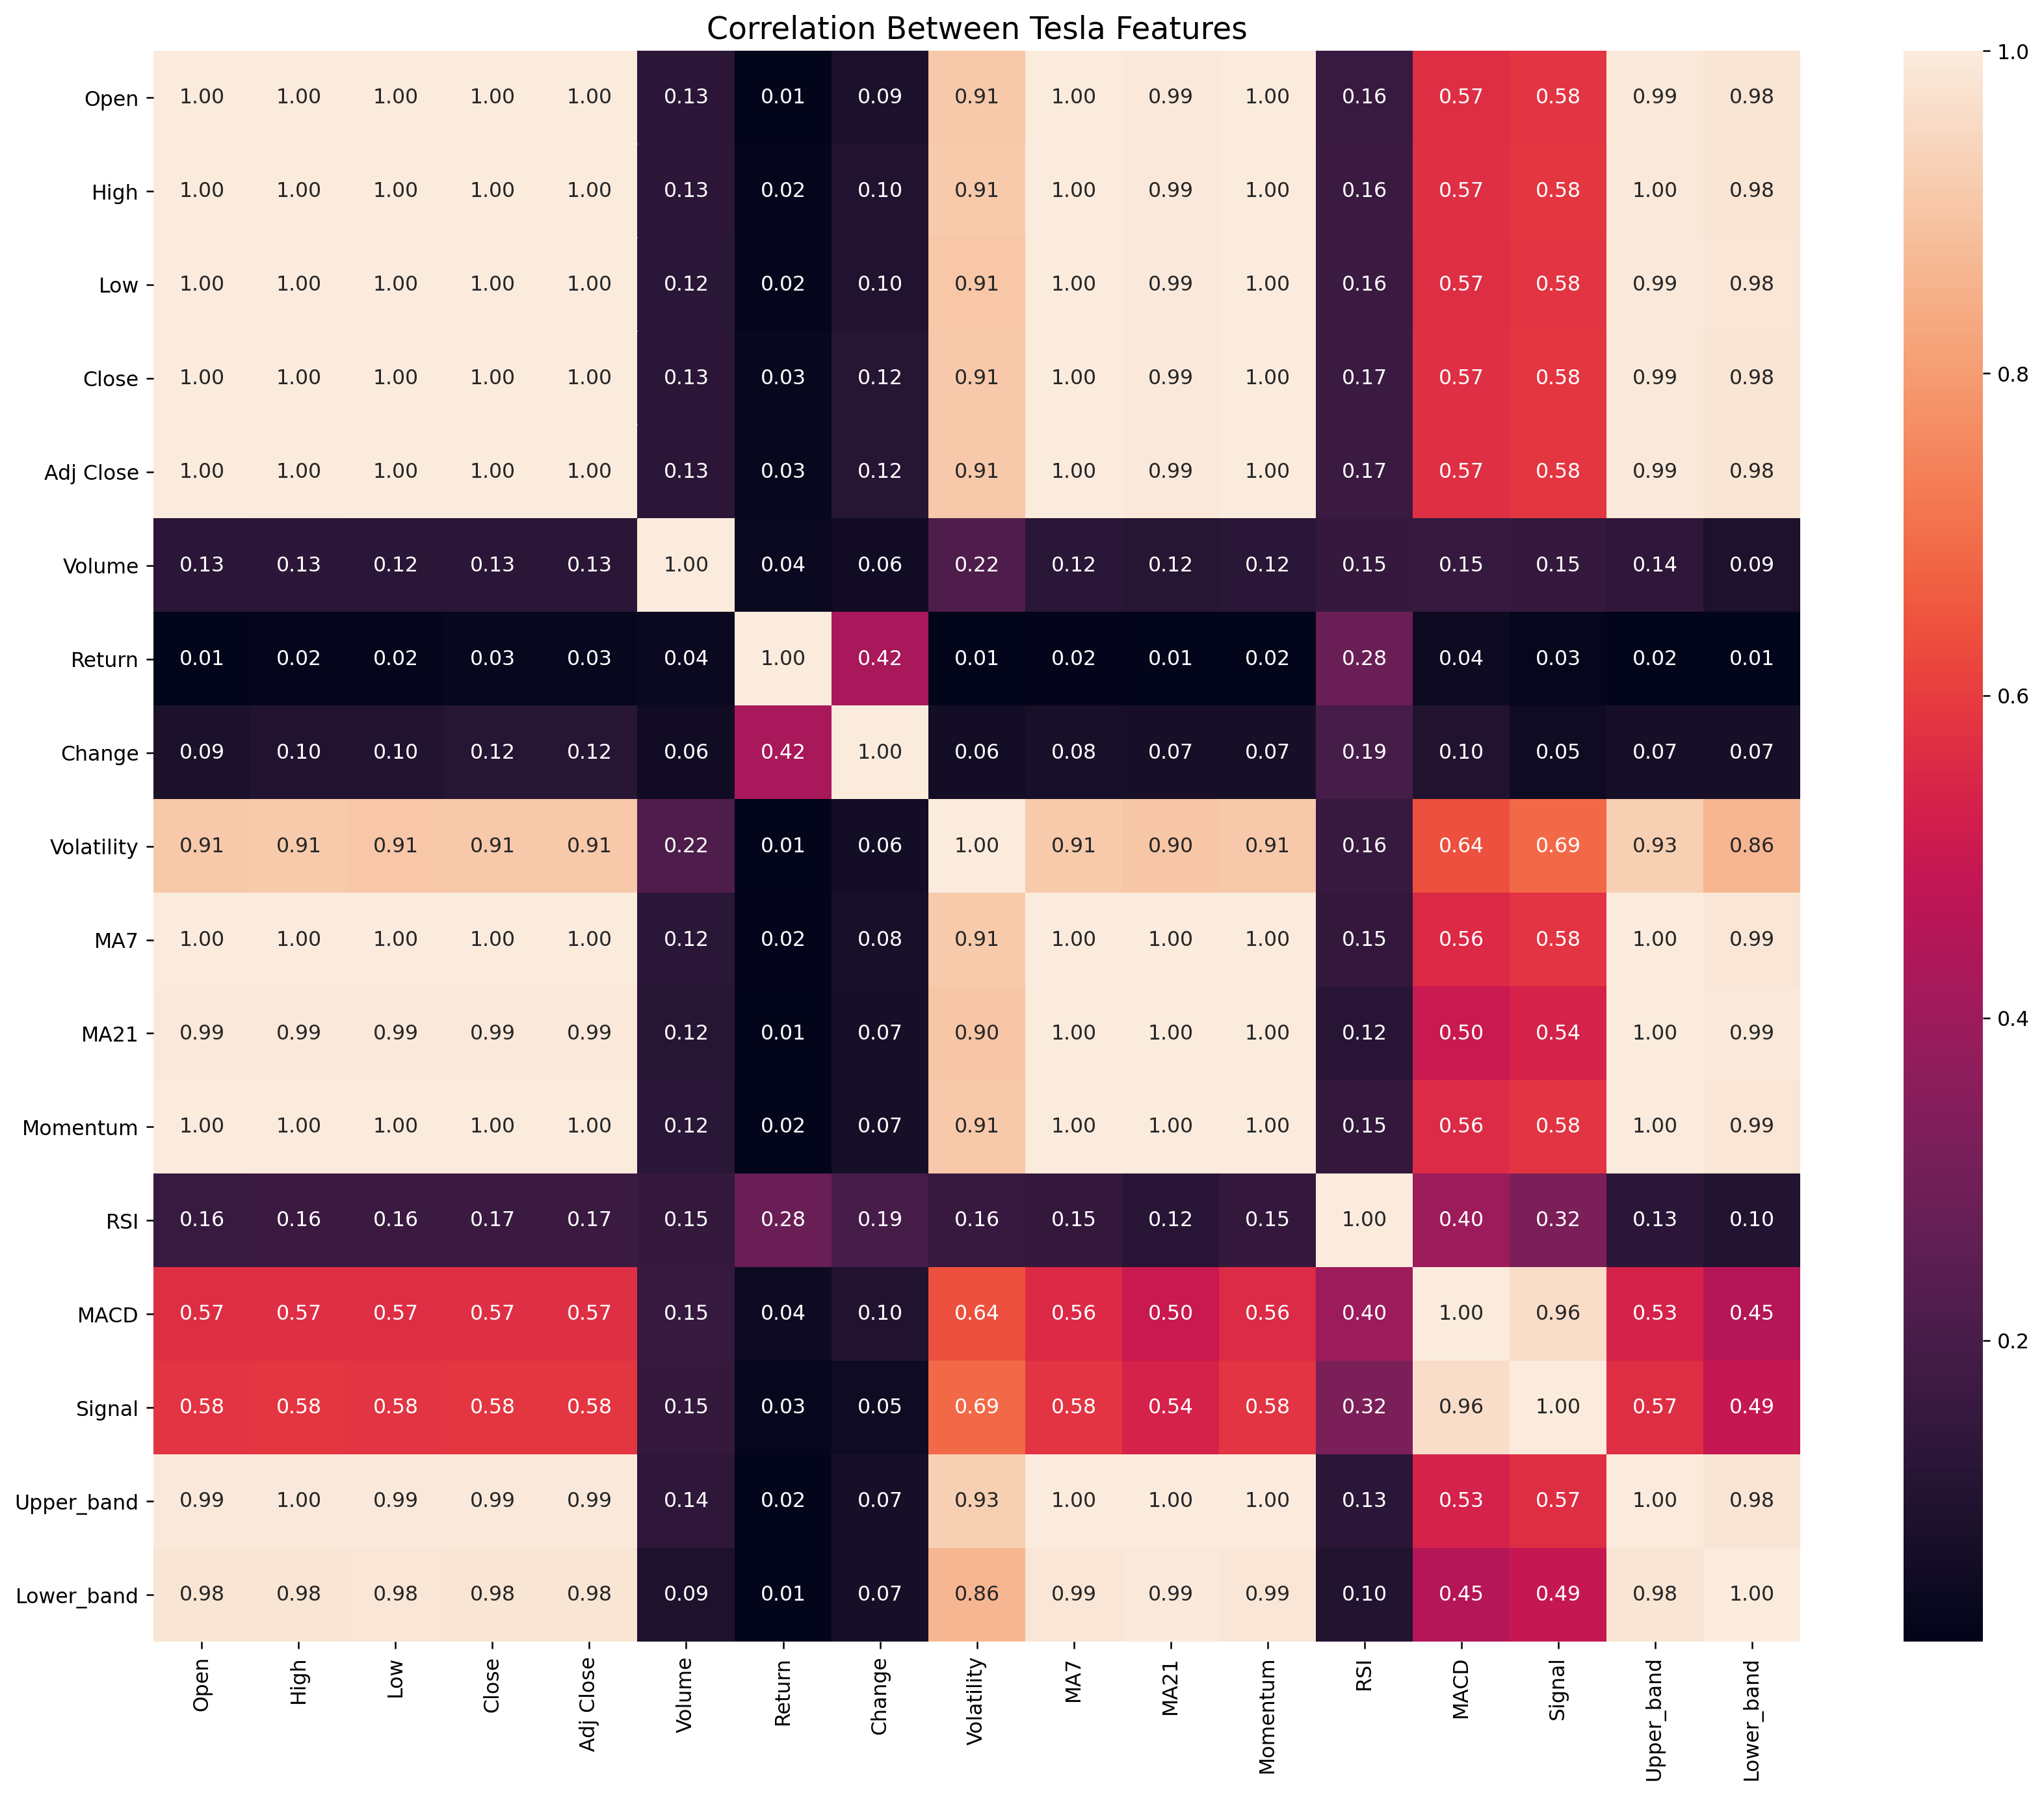

In [10]:
plt.rcParams['figure.dpi'] = 227
plt.figure(figsize=(18,14))
sns.heatmap(stocks['TSLA'].corr(), annot=True, fmt='.2f')
plt.ylim(17, 0)
plt.title('Correlation Between Tesla Features', fontSize=15)
plt.show()

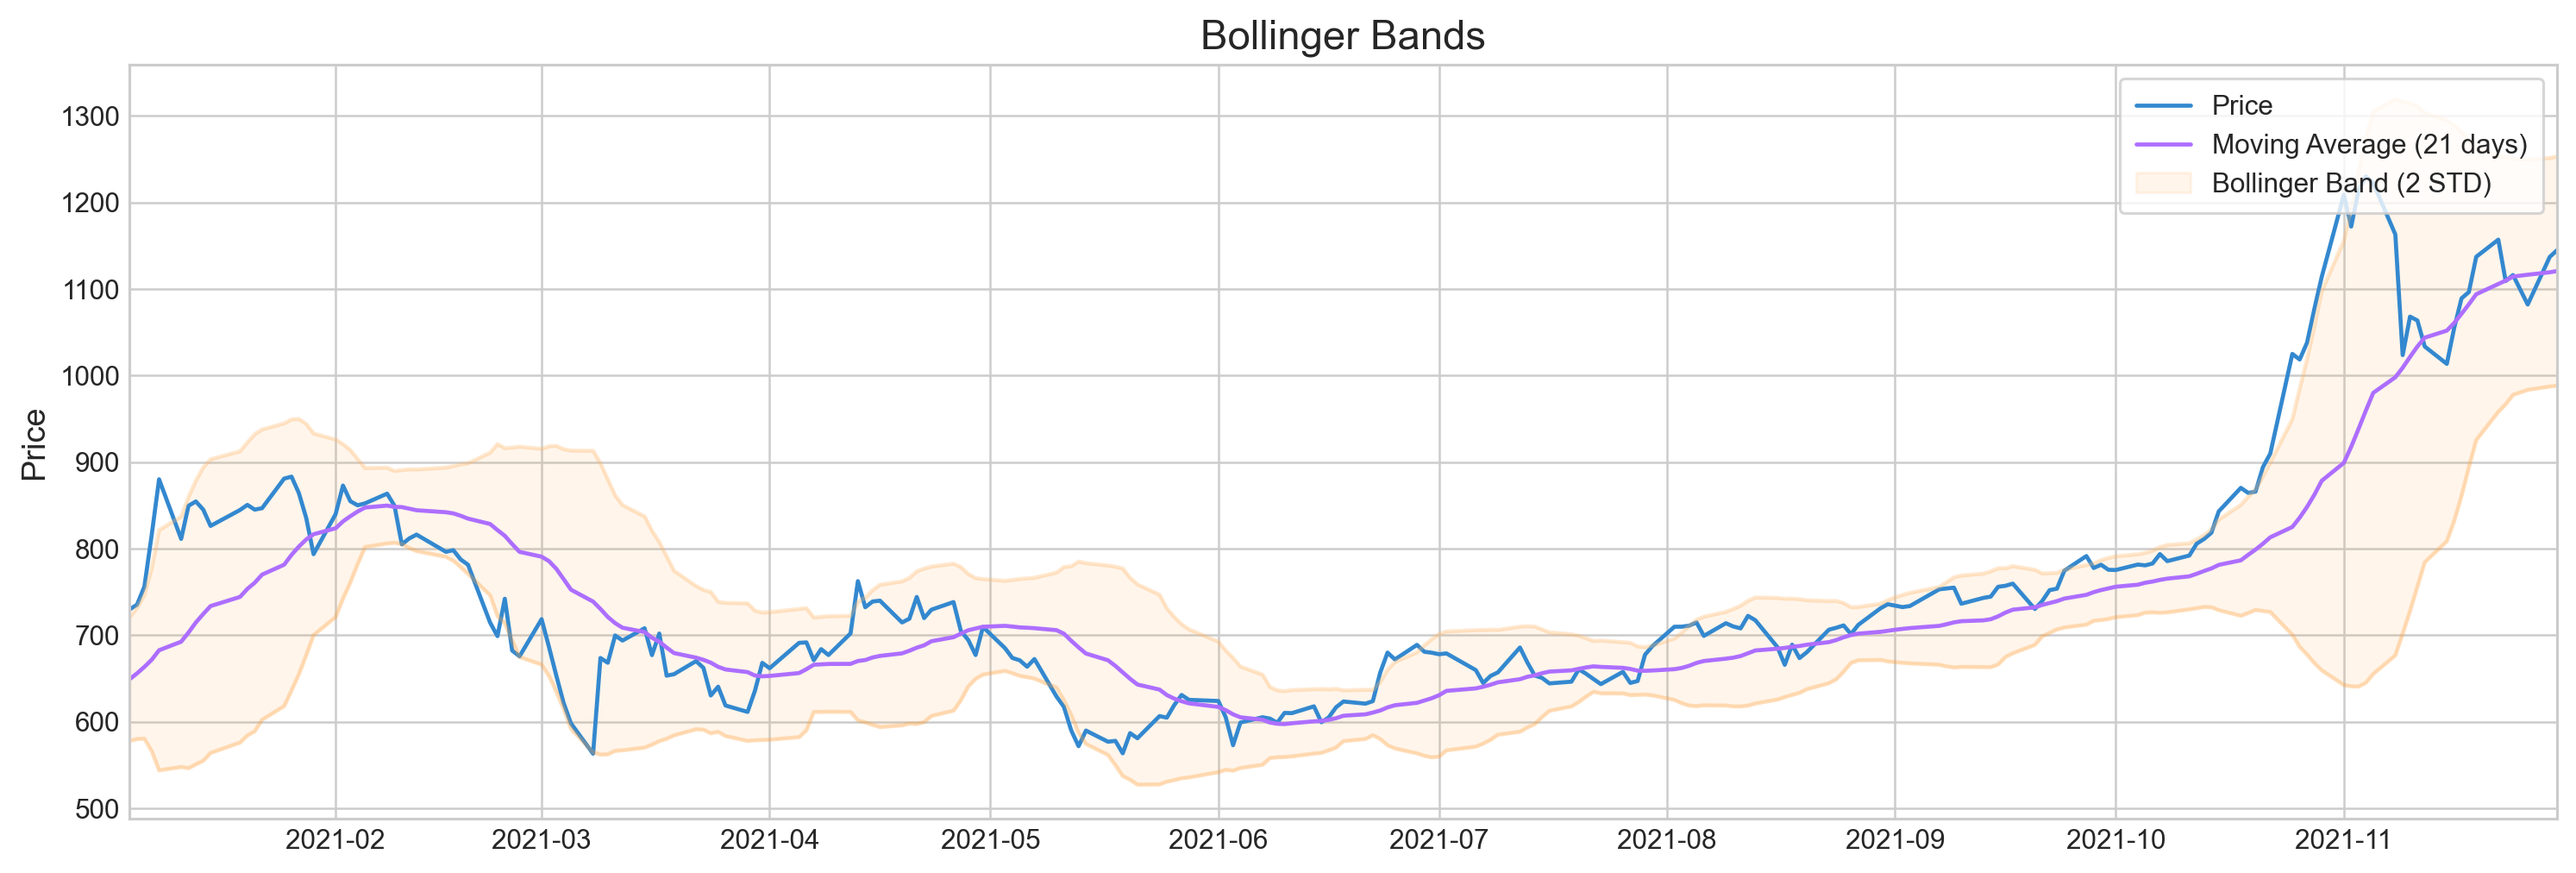

In [14]:
bollinger_bands(stocks['TSLA'].loc['2021':'2021'])

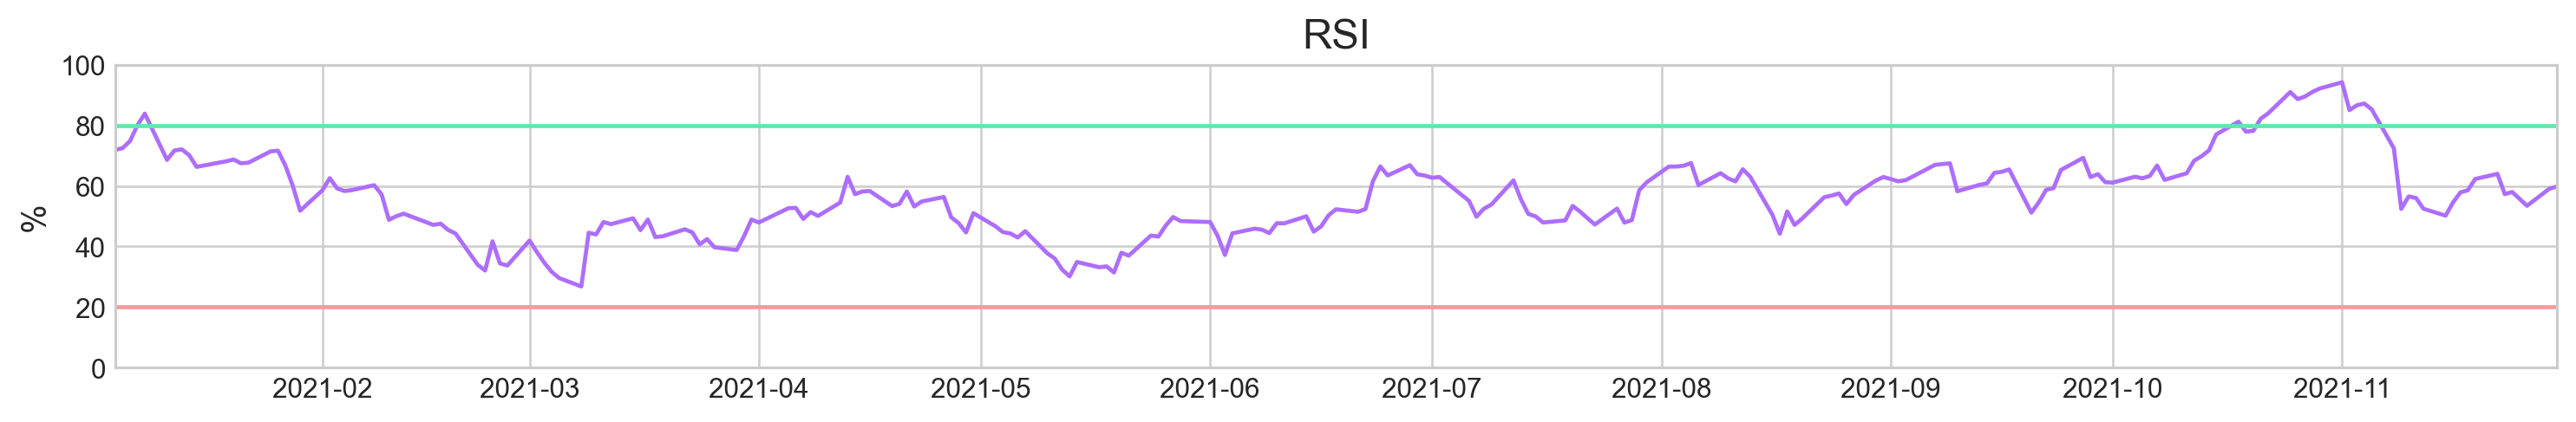

In [16]:
rsi(stocks['TSLA'].loc['2021':'2021'])

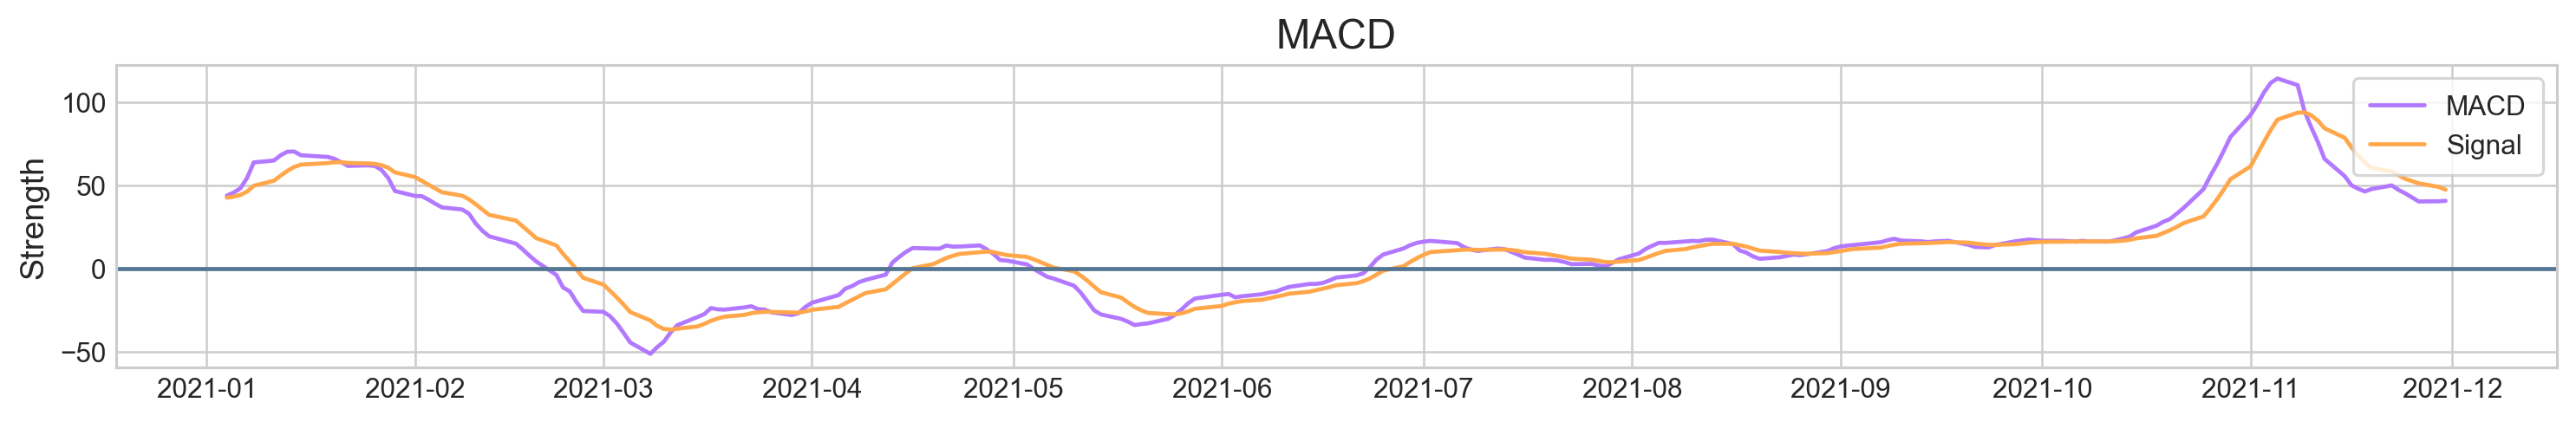

In [17]:
macd(stocks['TSLA'].loc['2021':'2021'])

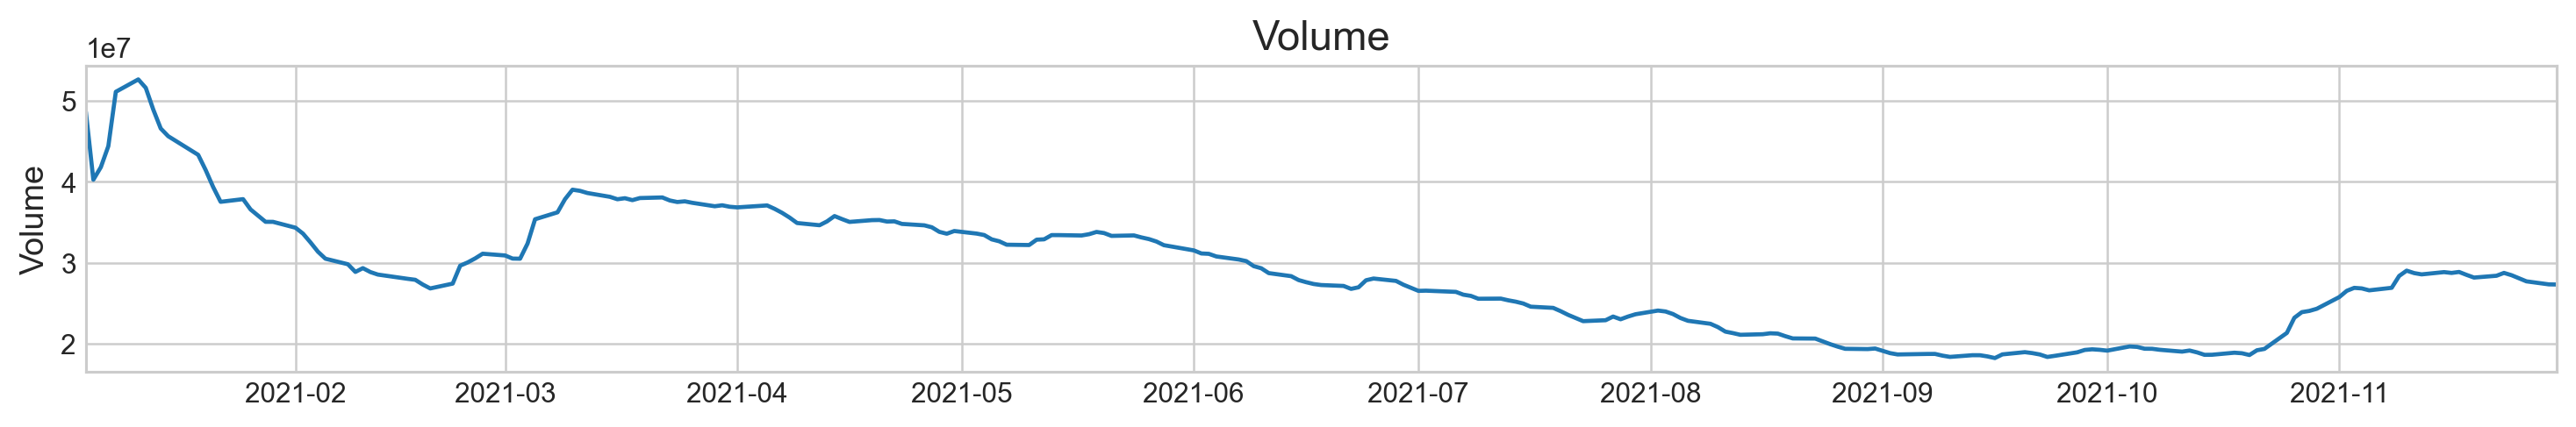

In [18]:
volume(stocks['TSLA'].loc['2021':'2021'])

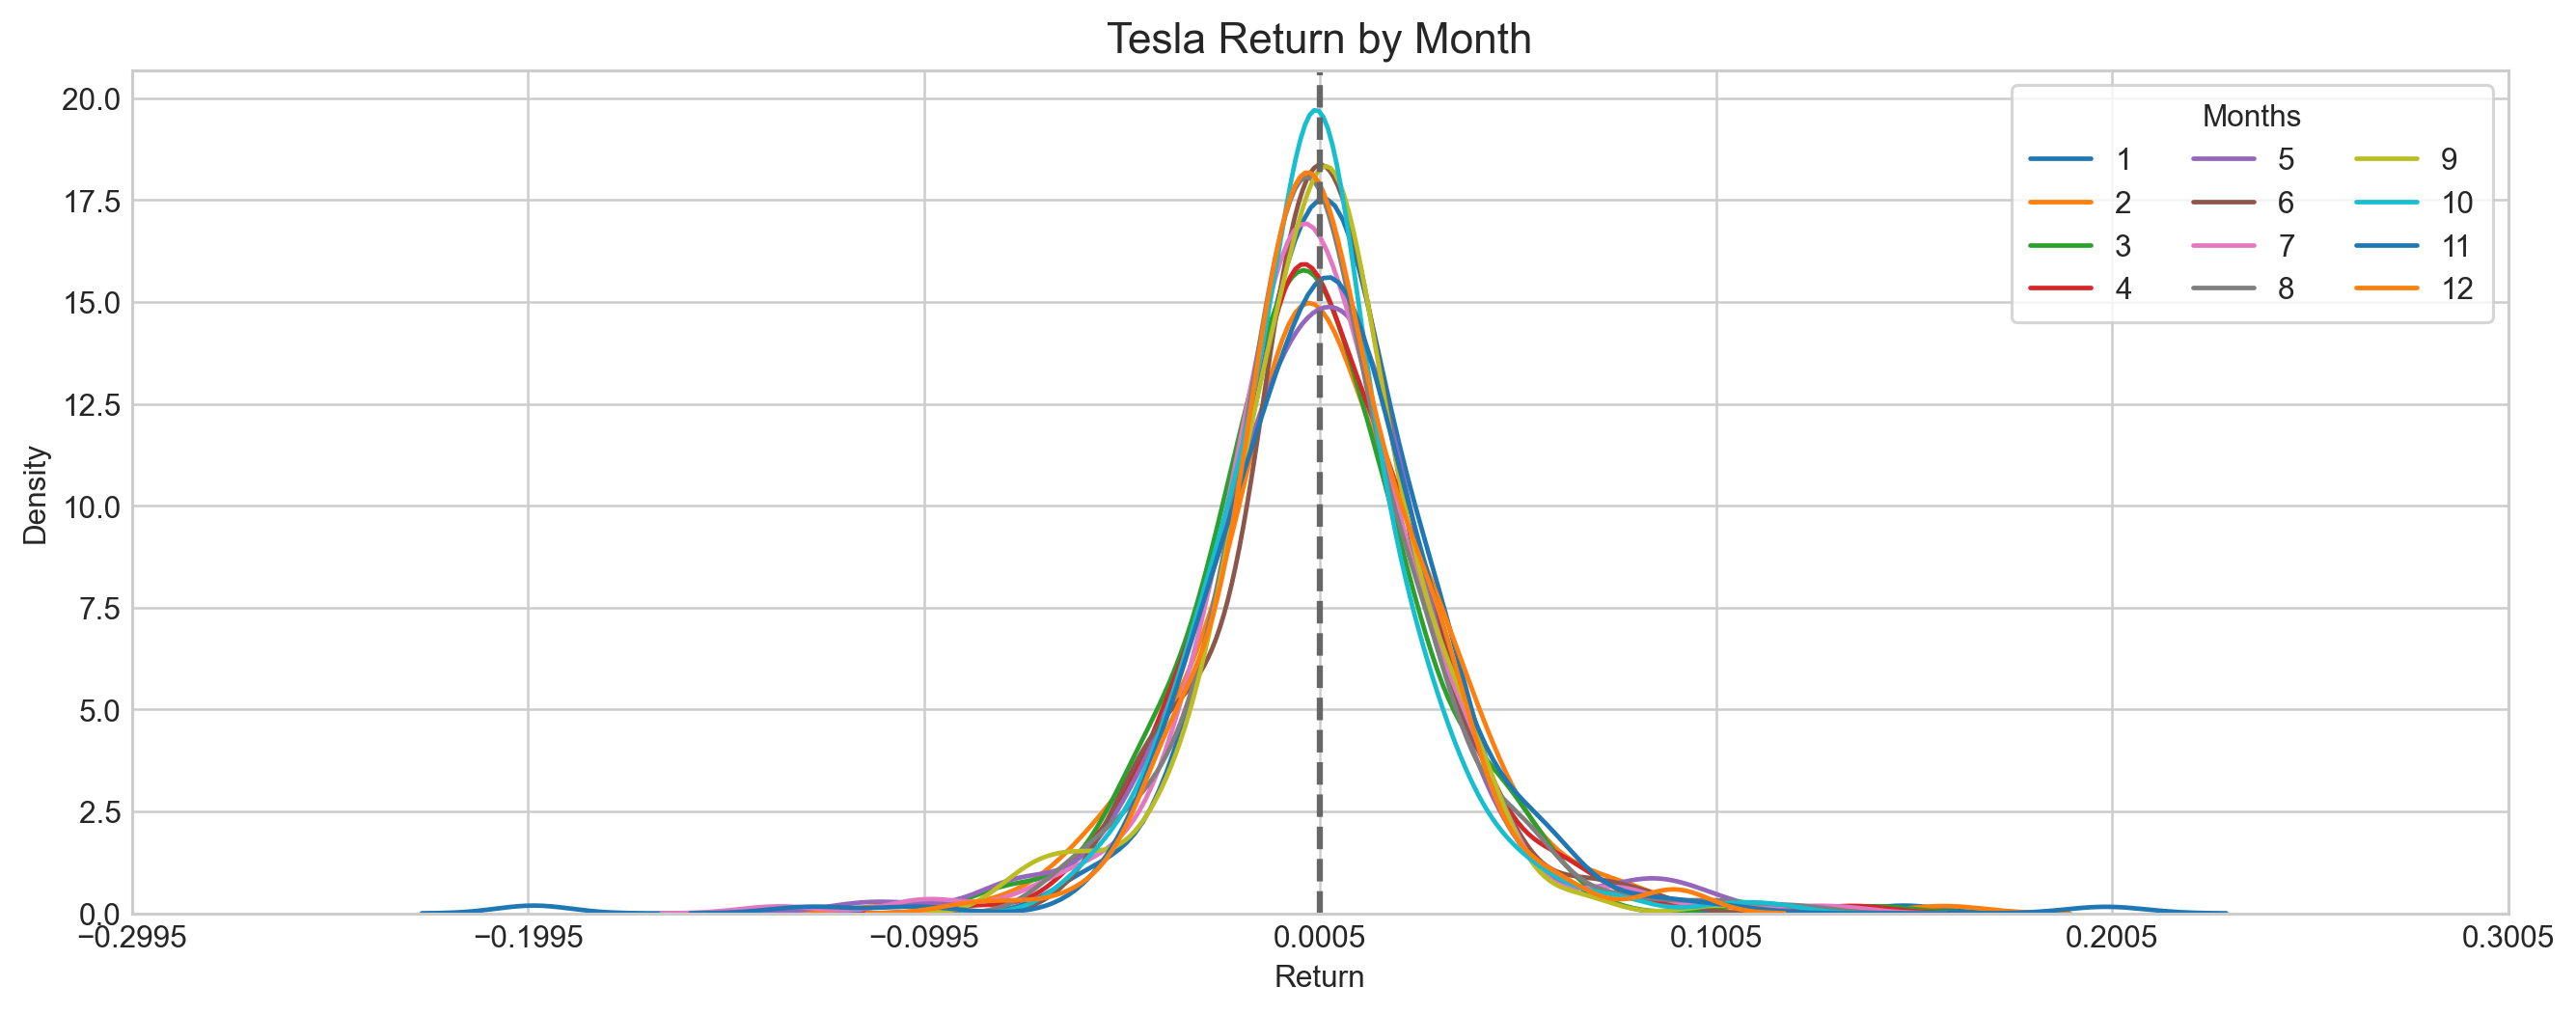

In [19]:
plt.figure(figsize=(14,5))
plt.style.use('seaborn-whitegrid')
for i in range(1,13):
    volatility = stocks['TSLA'][stocks['TSLA'].index.month==i].Return
    sns.distplot(volatility, hist=False, label=i)
    plt.legend(frameon=True, loc=1, ncol=3, fontsize=10, borderpad=.6, title='Months')
plt.axvline(stocks['TSLA'].Return.mean(), color='#666666', ls='--', lw=2)
plt.xticks(plt.xticks()[0] + stocks['TSLA'].Return.mean())
plt.title('Tesla Return by Month', fontSize=14)
plt.show()

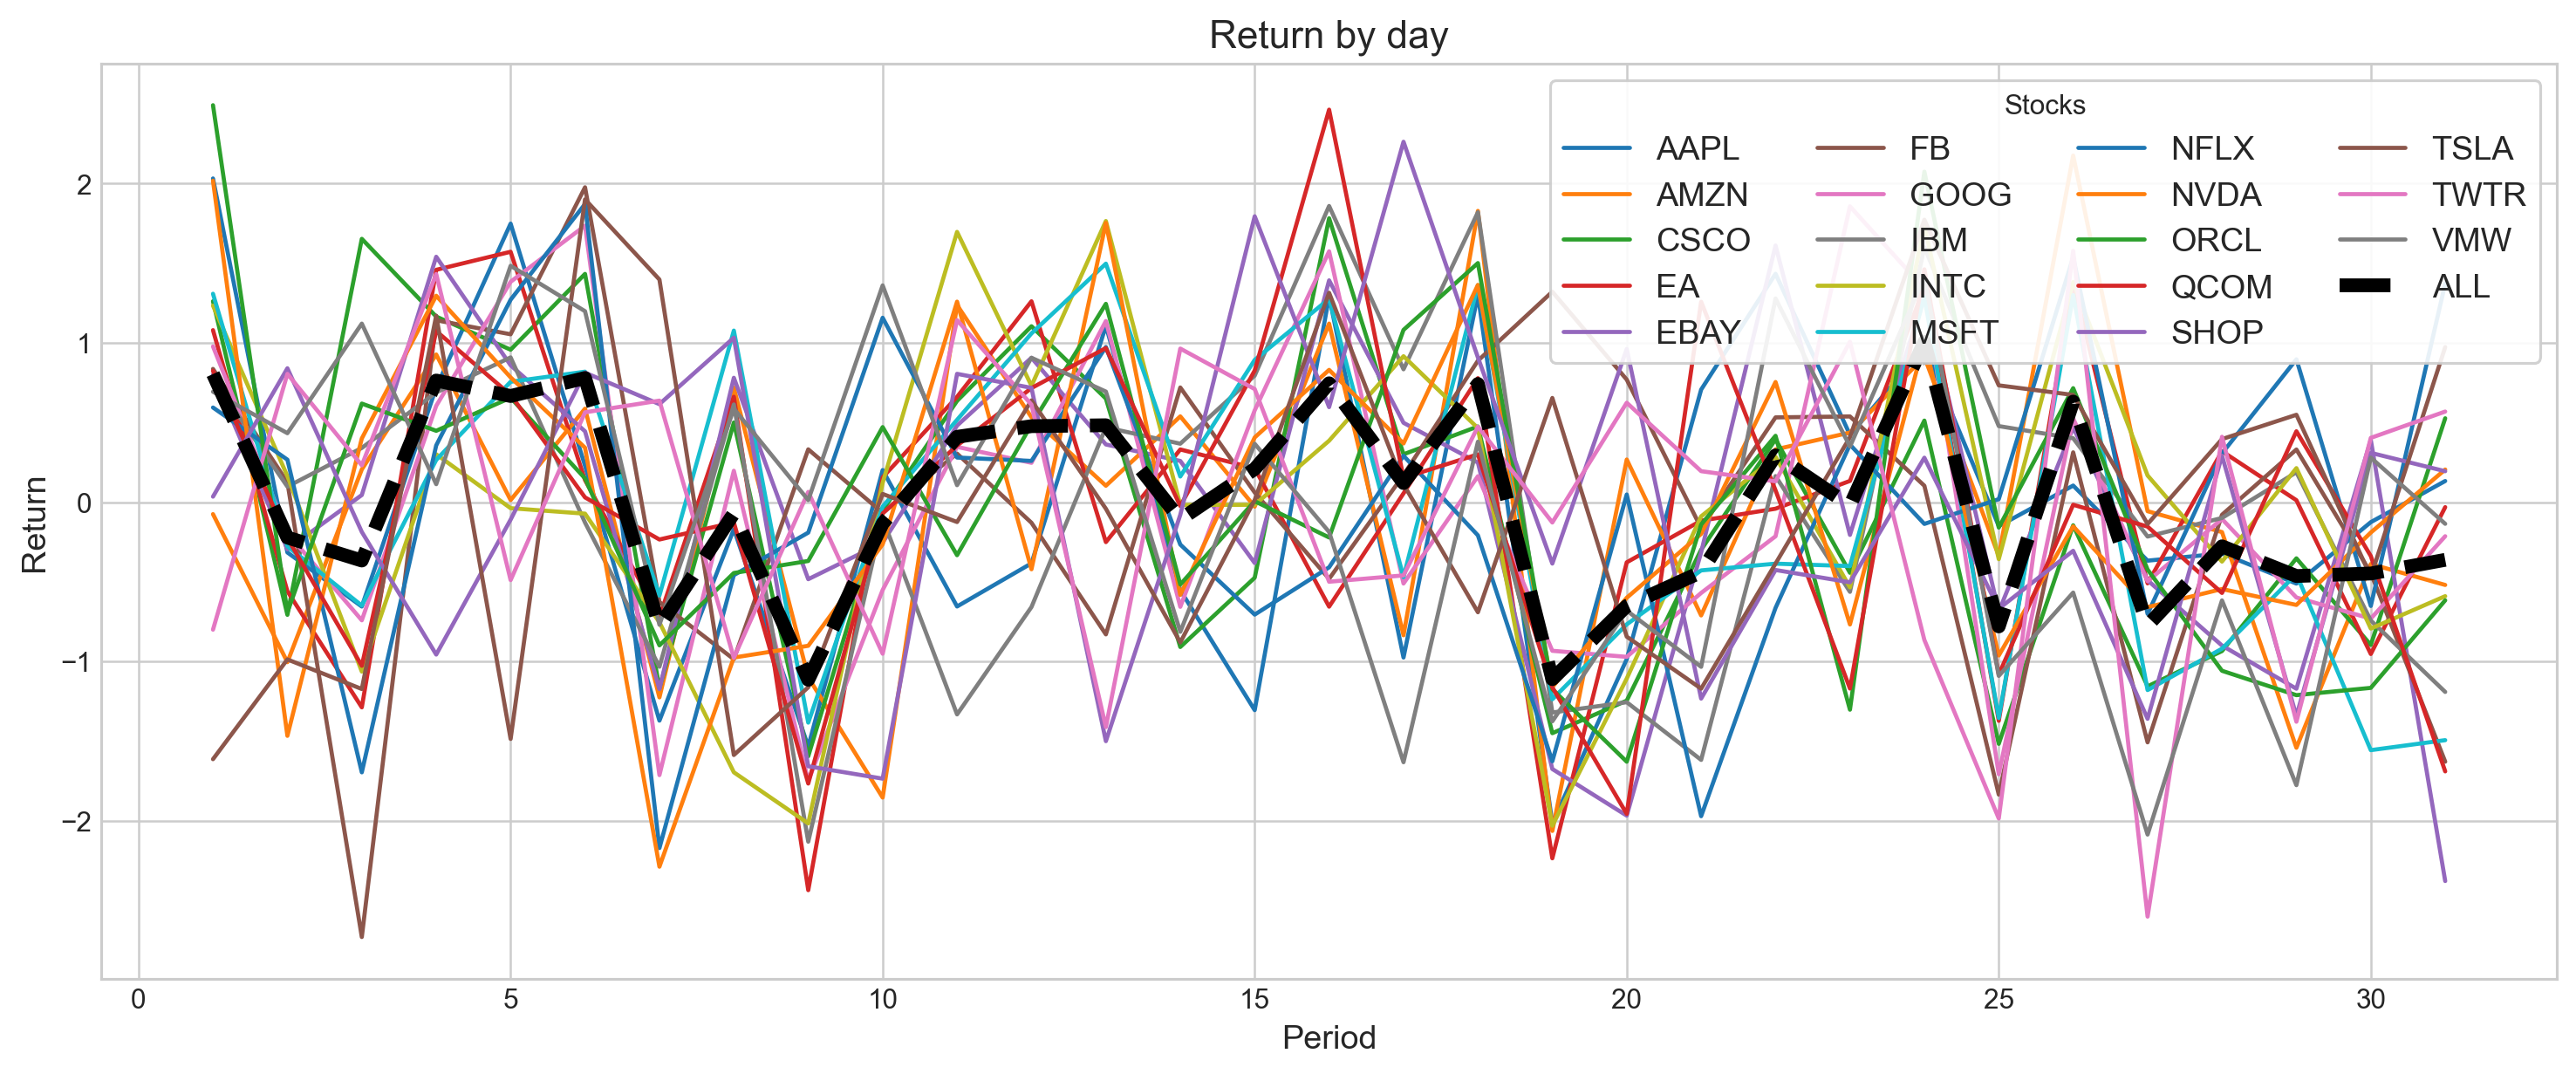

In [20]:
compare_stocks(stocks, value='Return', by='day', scatter=False)

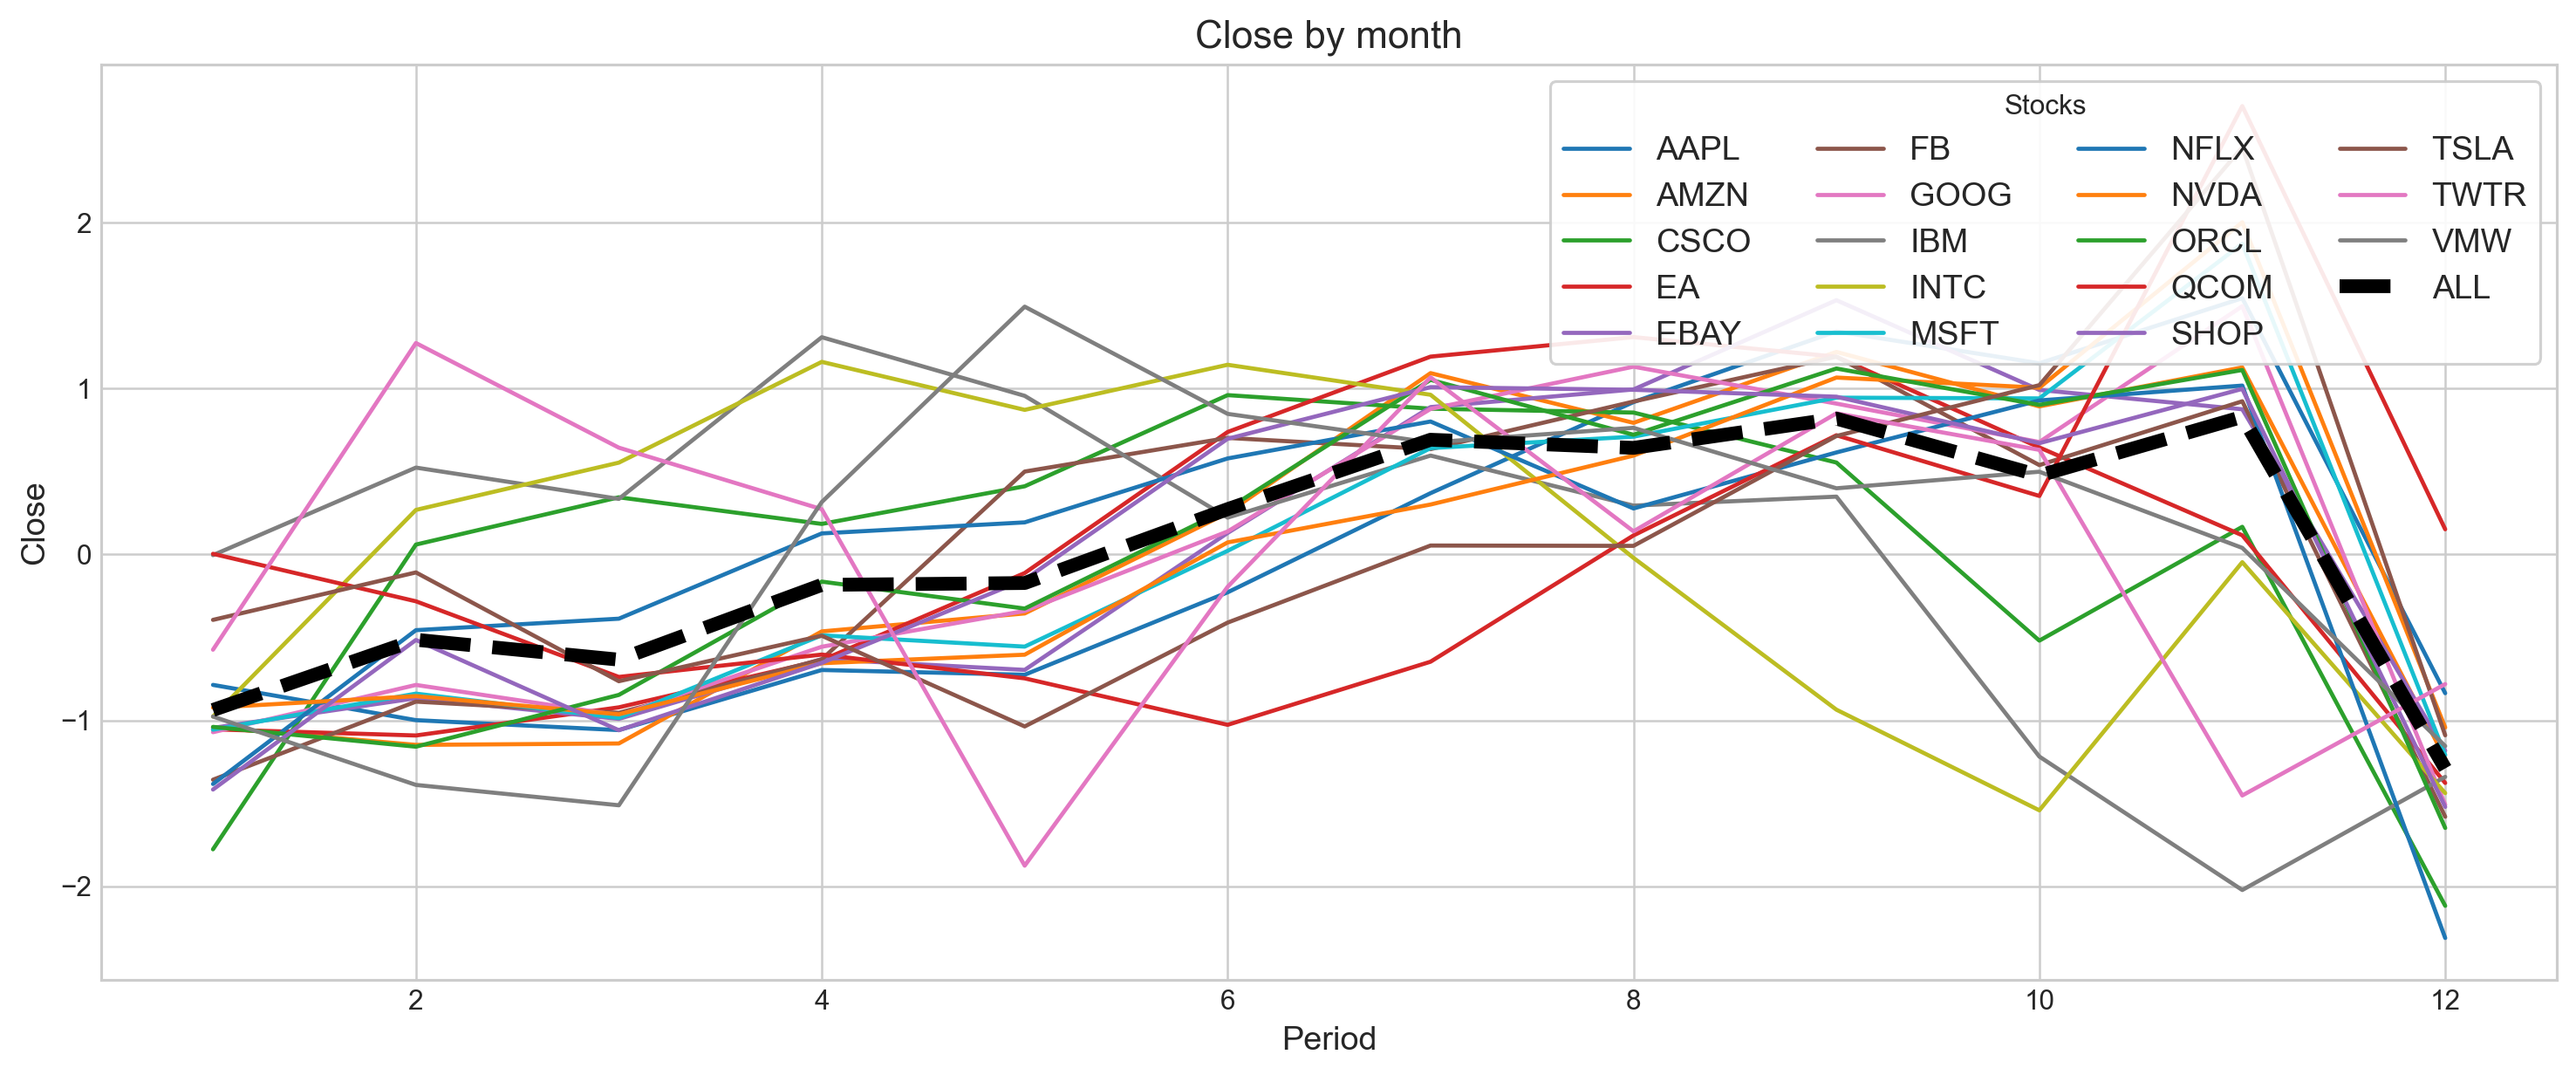

In [21]:
compare_stocks(stocks, value='Close', by='month', scatter=False)

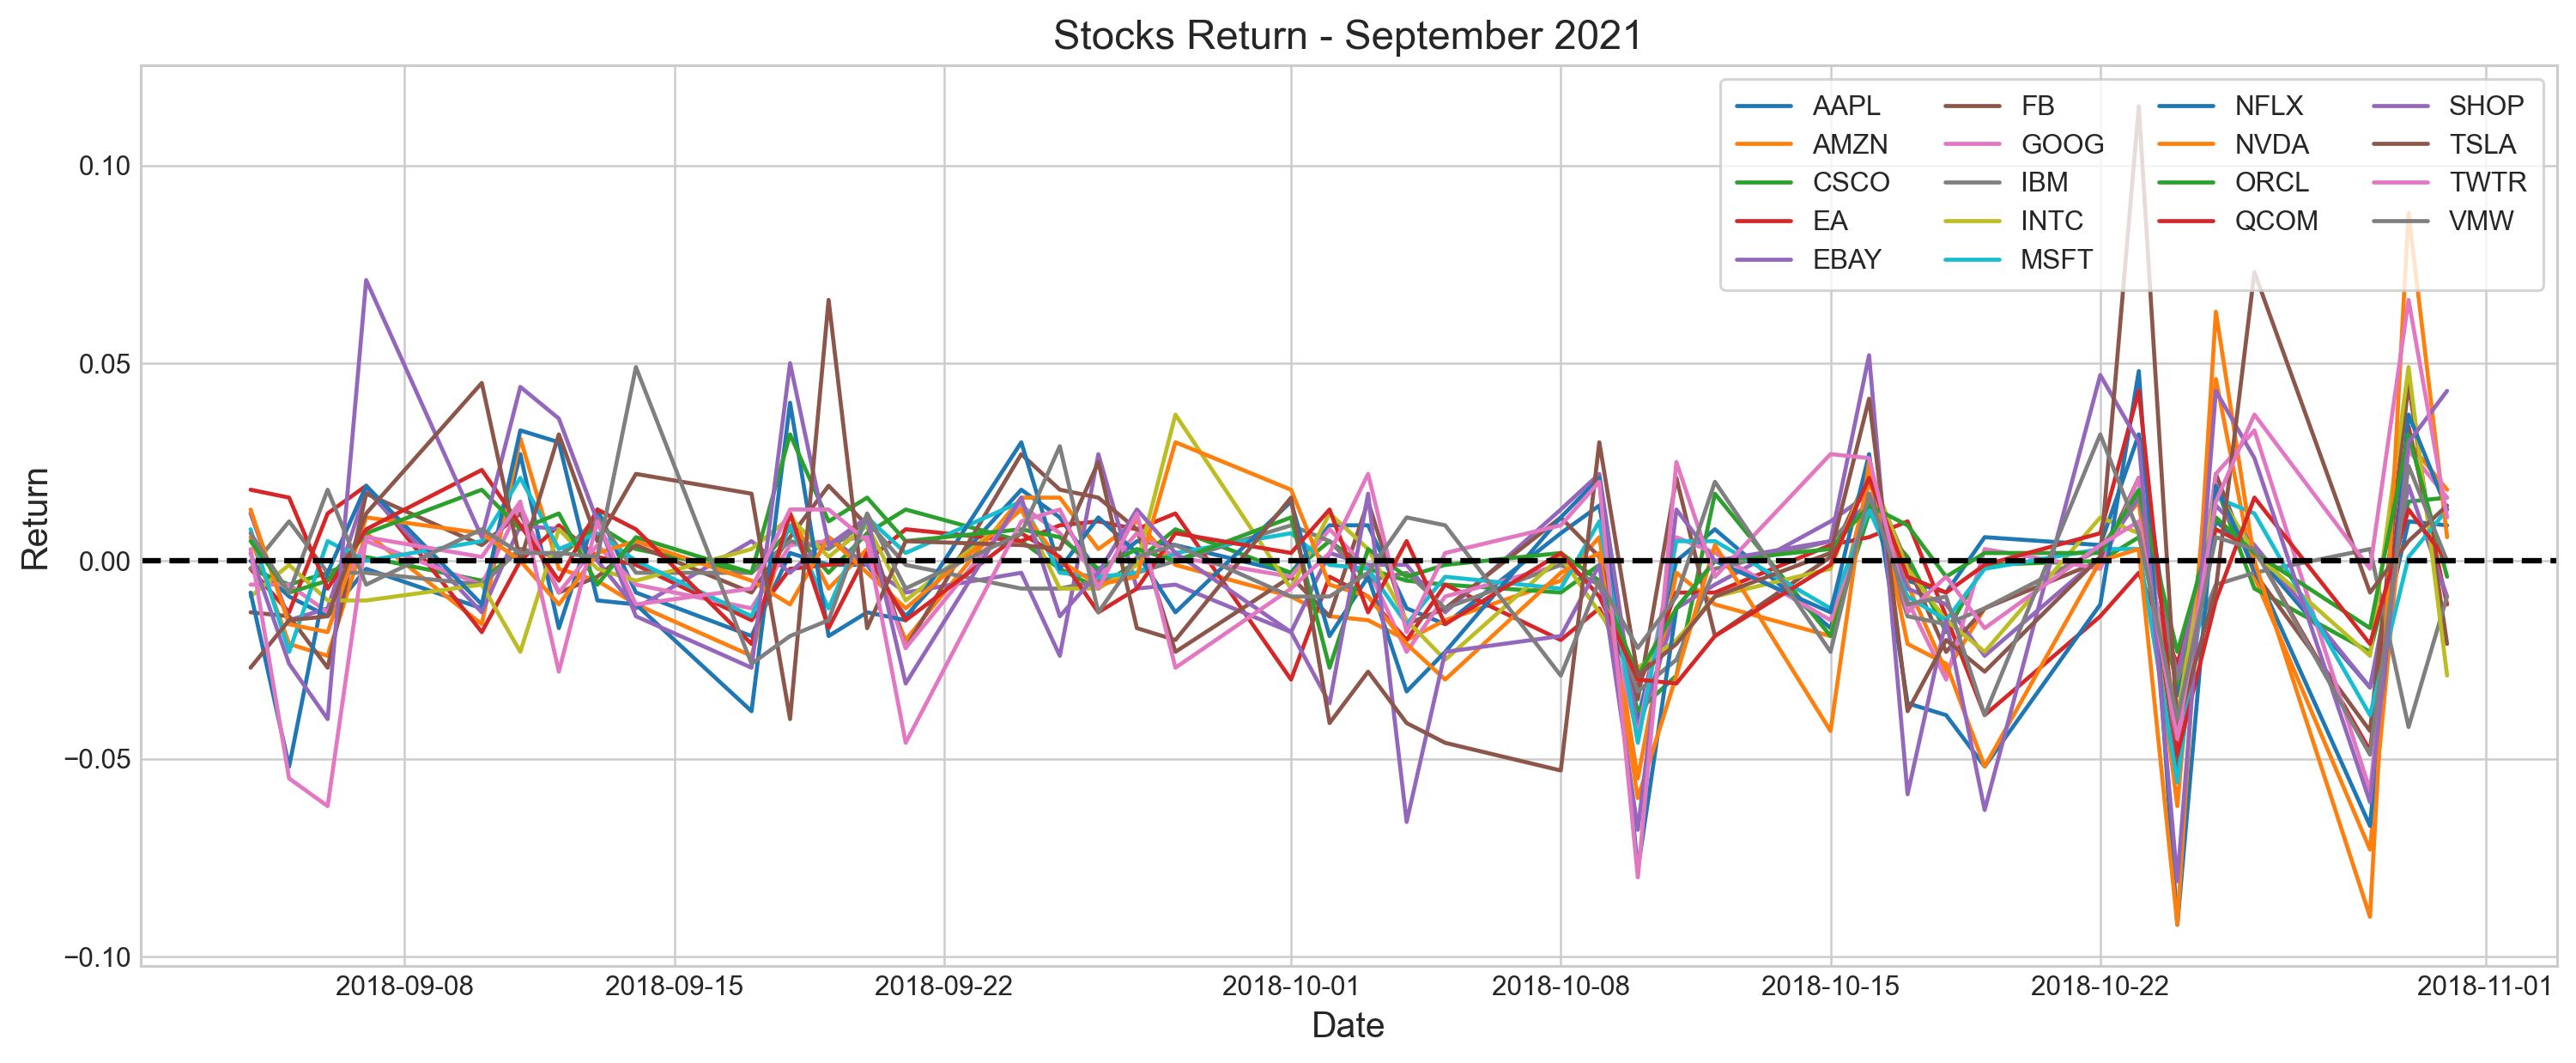

In [22]:
stocks_return_correlation = {}

plt.rcParams['figure.dpi'] = 227
plt.figure(figsize=(16,6))
plt.style.use('seaborn-whitegrid')
for i in stocks:    
    stocks_return_correlation[i] = stocks[i].loc['2021-9':'2021-10'].Return
    plt.plot(stocks[i].loc['2018-9':'2018-10'].Return, label=i)
    plt.legend(frameon=True, loc=1, ncol=4, fontsize=10, borderpad=.6)
plt.title('Stocks Return - September 2021', fontSize=15)
plt.xlabel('Date', fontSize=13)
plt.ylabel('Return', fontSize=13)
plt.axhline(0, c='k', lw=2, ls='--')
plt.show()

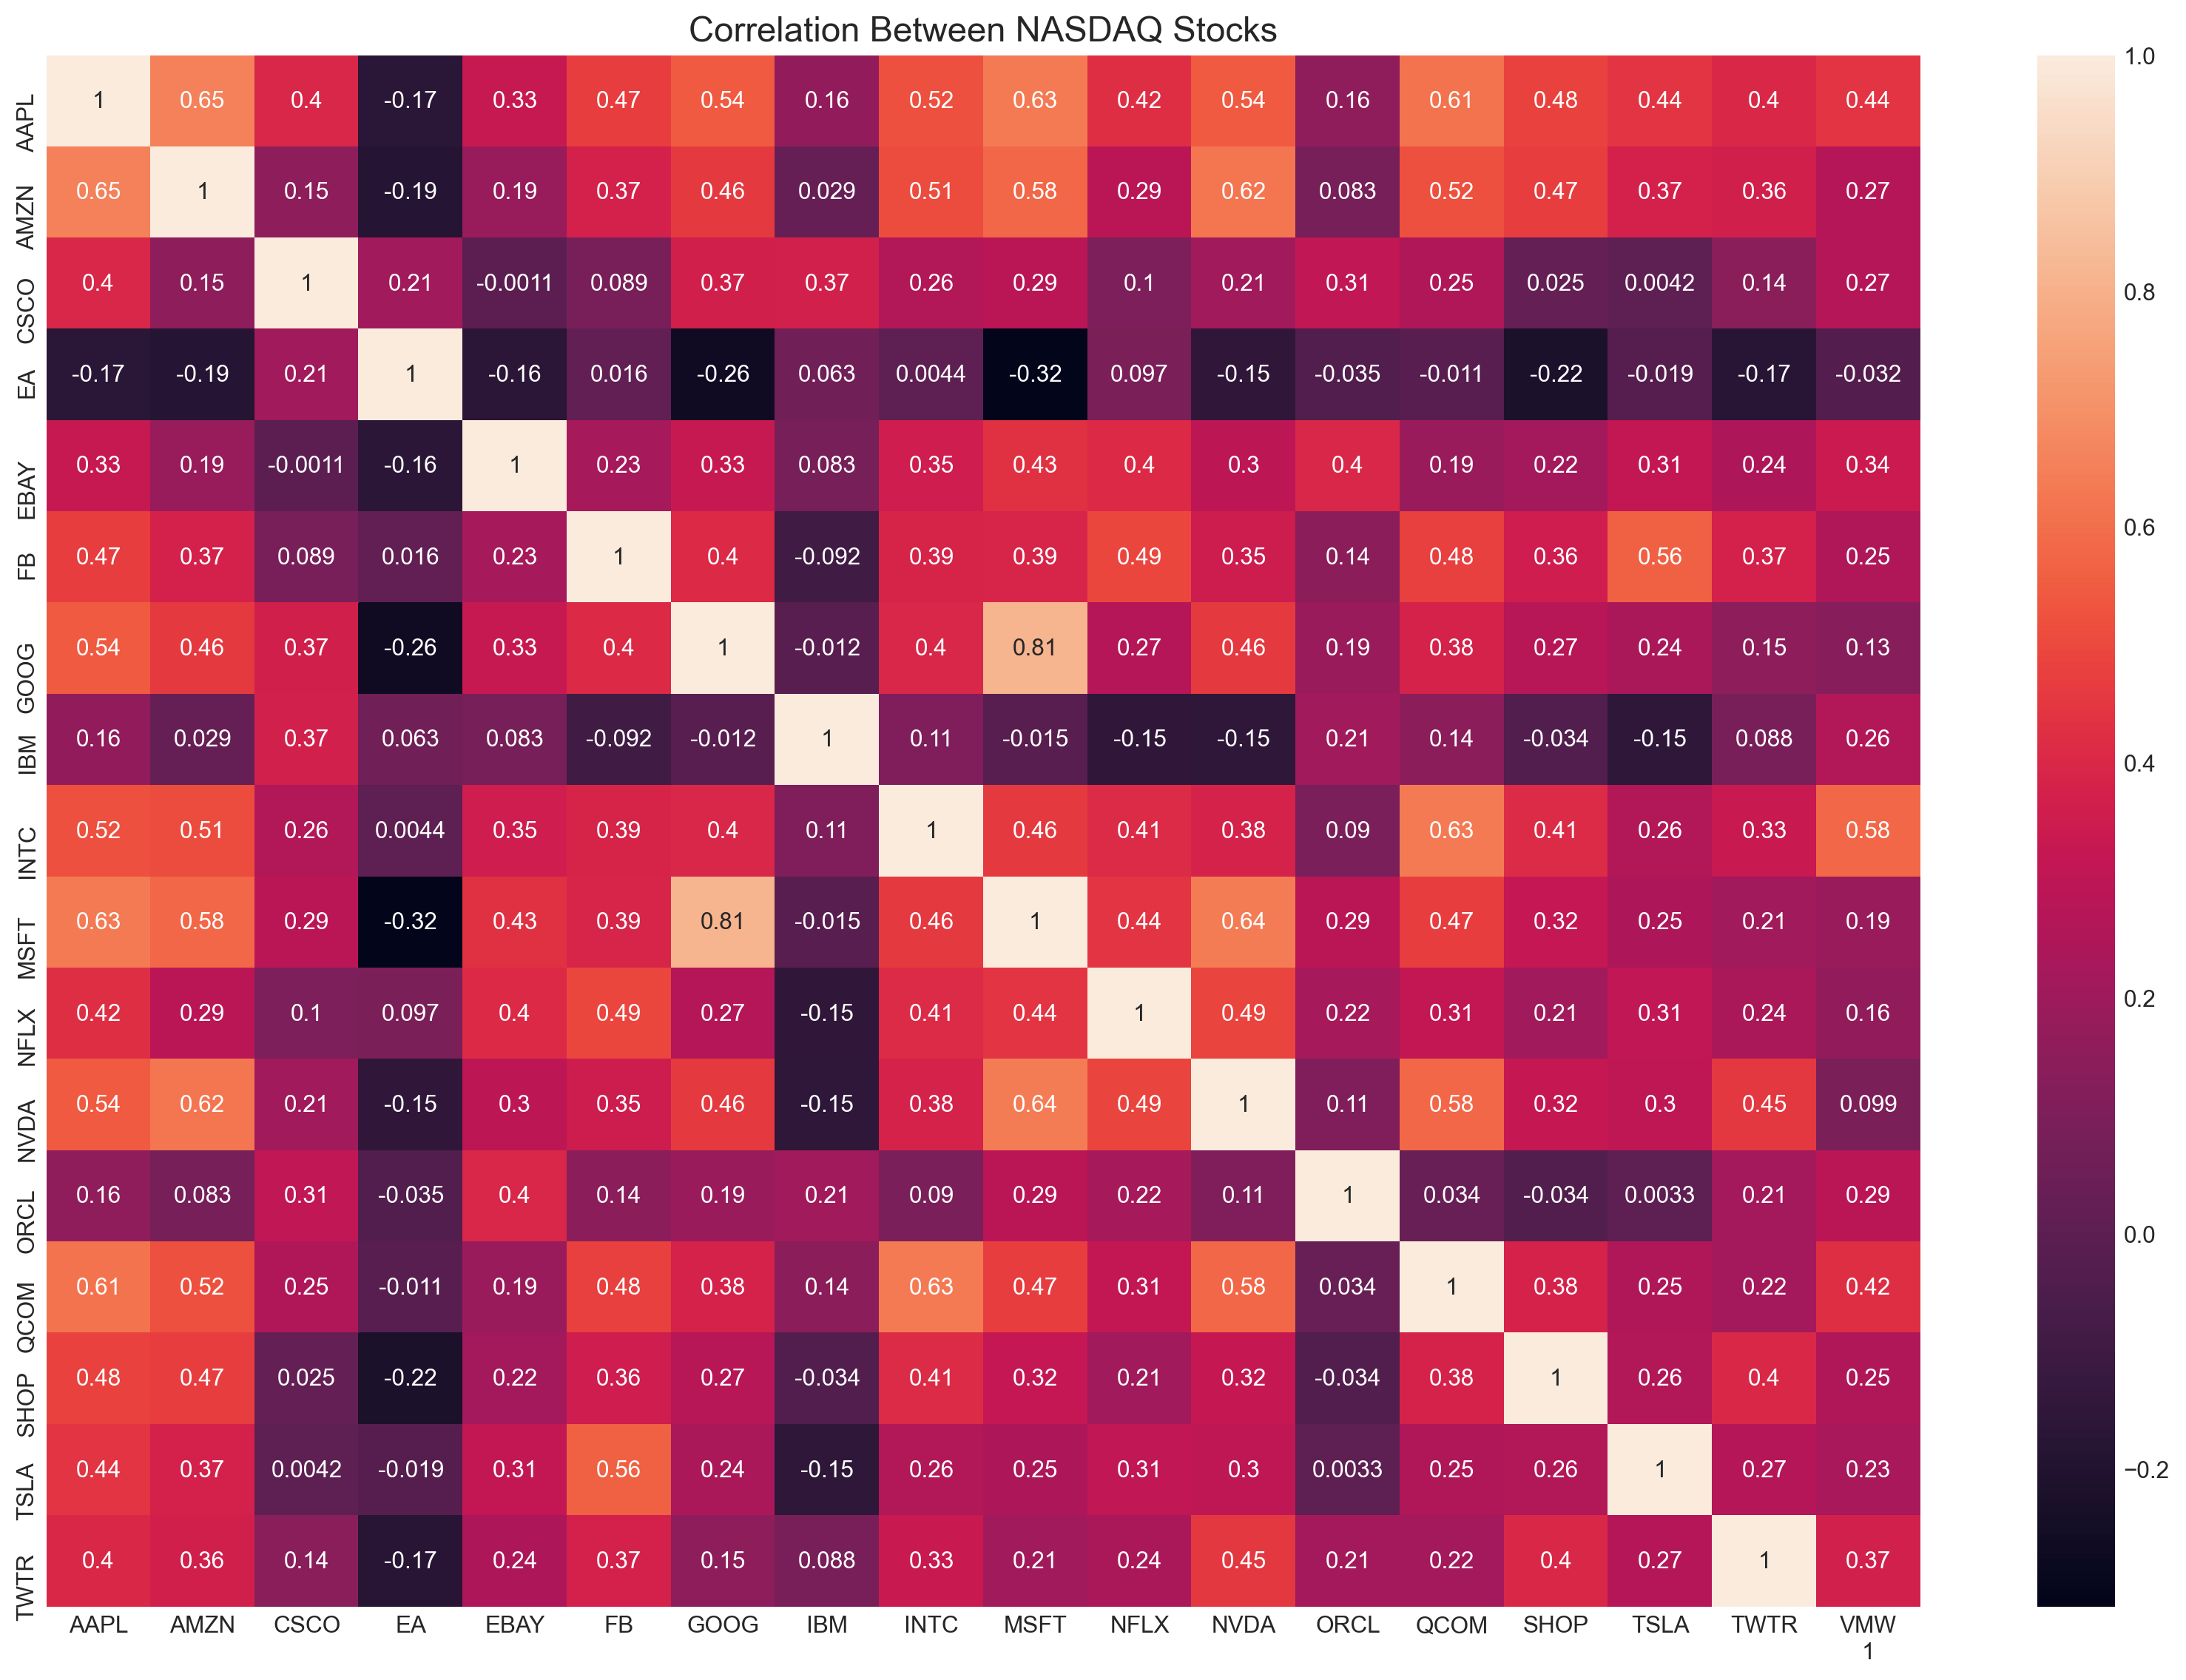

In [23]:
plt.figure(figsize=(18,12))
sns.heatmap(pd.DataFrame(stocks_return_correlation).corr(), annot=True)
plt.ylim(17, 0)
plt.title('Correlation Between NASDAQ Stocks', fontSize=15)
plt.show()

In [24]:
stocks_corr = {}

for i in stocks:
    stock1 = stocks[i].loc['2020':'2021'].Return
    c = {}
    for j in stocks:
        stock2 = stocks[j].loc['2020':'2021'].Return
        if i != j :
            c[j] = np.corrcoef(stock1, stock2)[0][1]
    m = max(c.items(), key=operator.itemgetter(1))
    stocks_corr[(i+"-"+m[0])] = [m[1]]

In [25]:
pd.DataFrame(stocks_corr).T.sort_values(by=0, ascending=False).head(10)

0
MSFT-GOOG  0.747646
GOOG-MSFT  0.747646
AAPL-MSFT  0.727599
FB-GOOG    0.703103
NVDA-MSFT  0.652569
AMZN-GOOG  0.651267
QCOM-MSFT  0.608012
NFLX-AMZN  0.603427
CSCO-IBM   0.567369
IBM-CSCO   0.567369

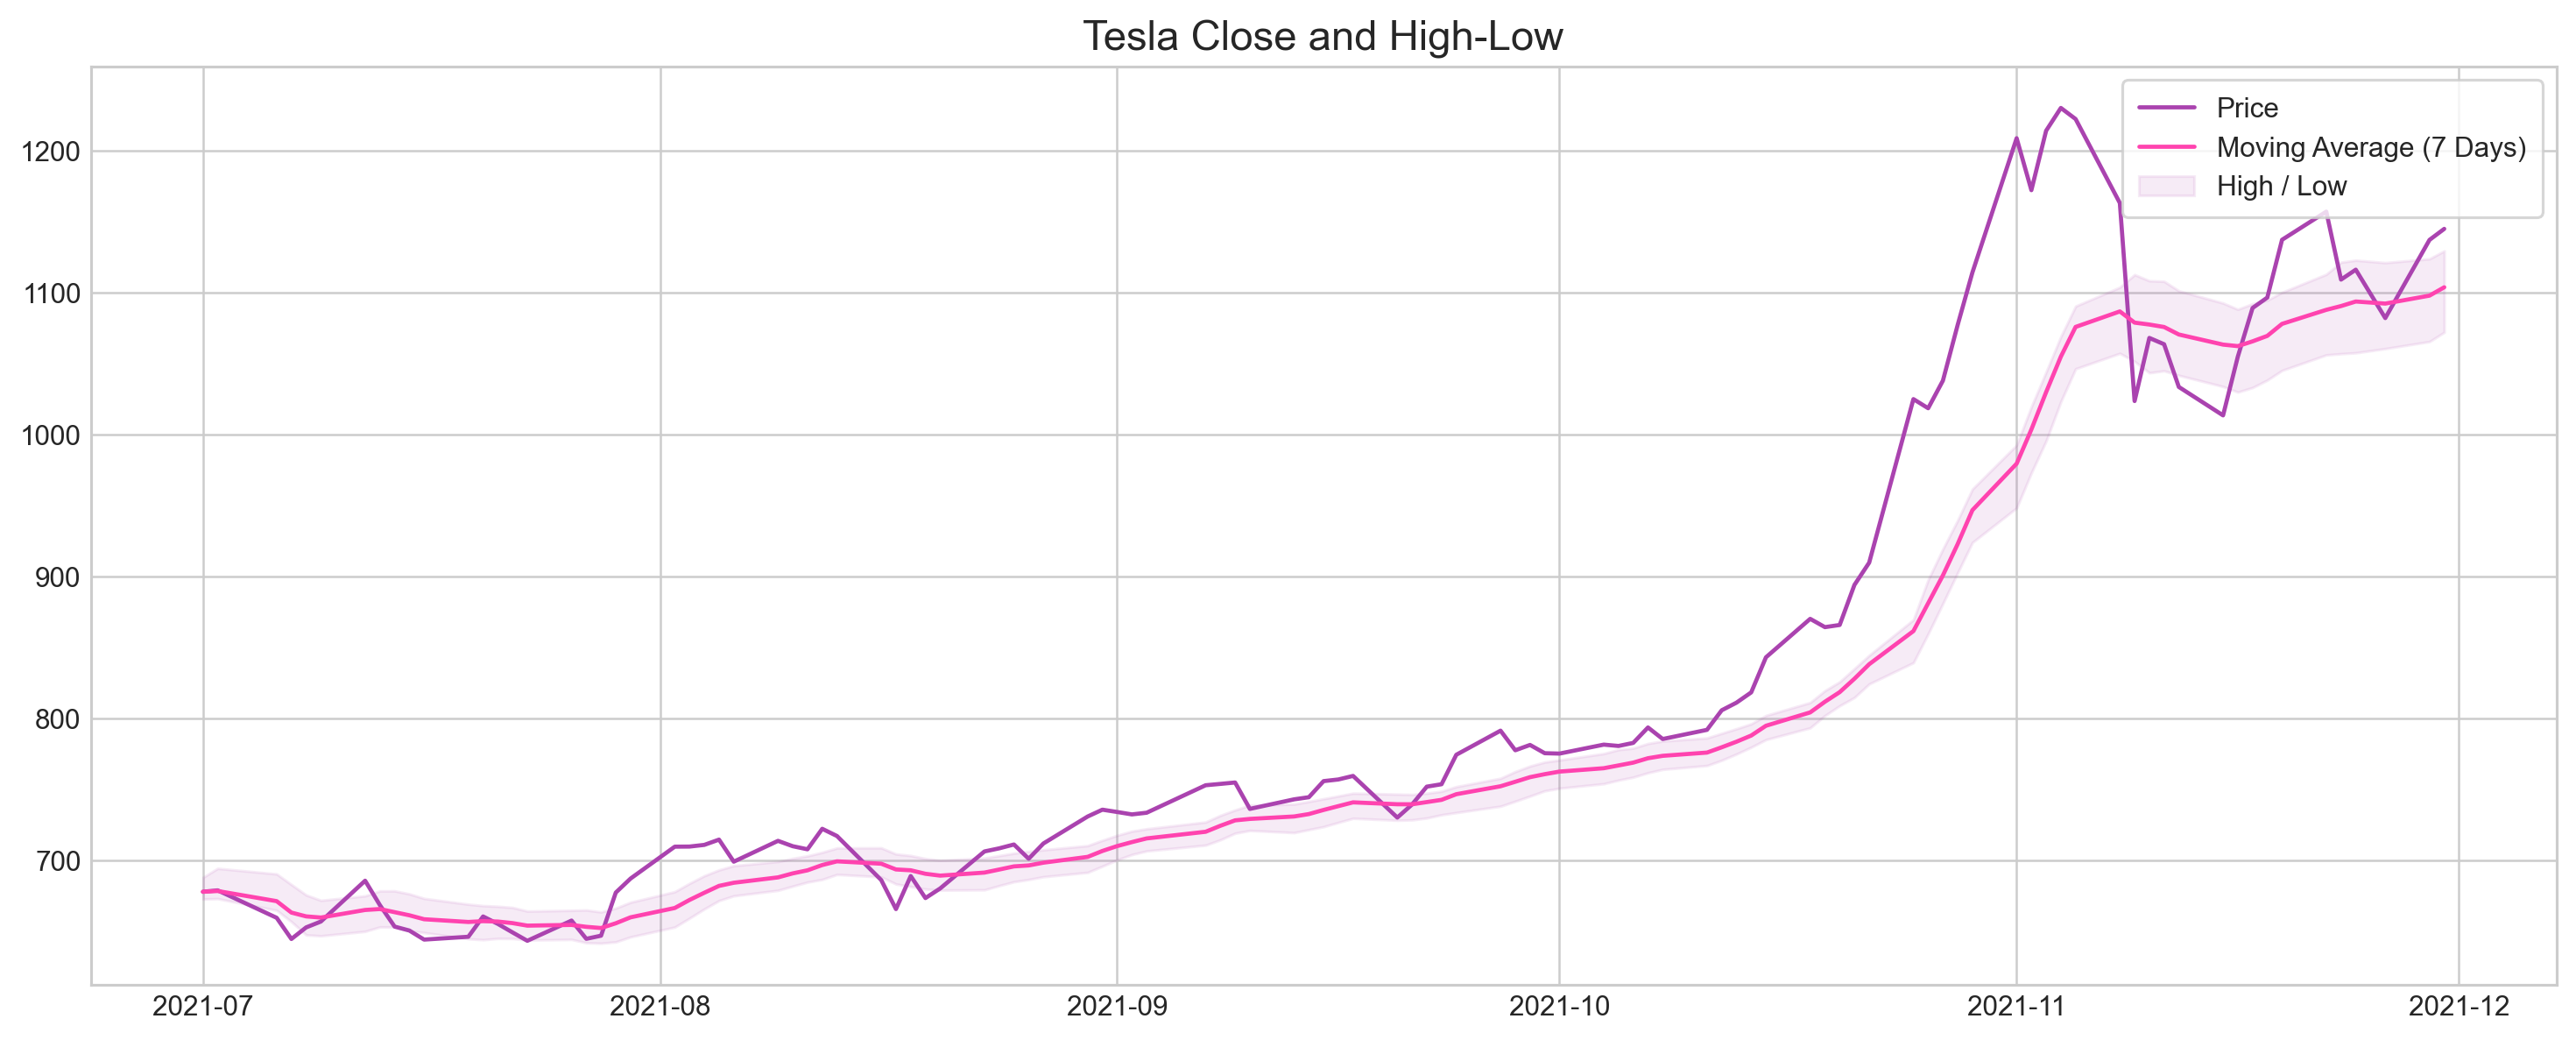

In [27]:
plt.figure(figsize=(16,6))

s = stocks['TSLA'].loc['2021-7':'2021']
u = s.High.ewm(7).mean()
l = s.Low.ewm(7).mean()
plt.fill_between(s.index, u, l, color='#af43af', alpha=0.1, label='High / Low')
plt.plot(s.Close, color='#aa43af', label='Price')
plt.plot(s.Close.ewm(7).mean(), color='#ff43af', label='Moving Average (7 Days)')
plt.legend(frameon=True, loc=1, borderpad=.6)
plt.title('Tesla Close and High-Low', fontSize=15)
plt.show()

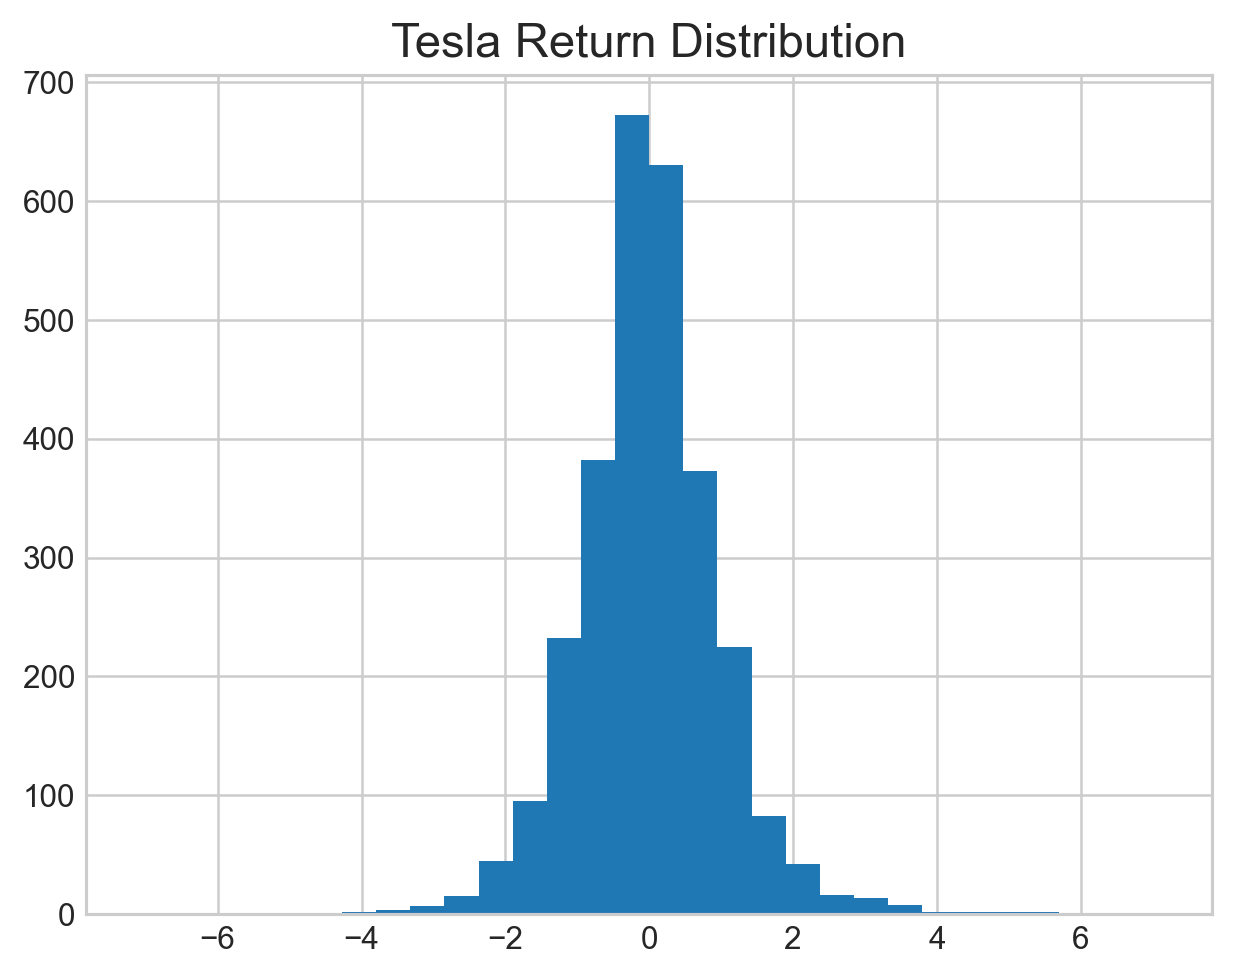

In [28]:
z = lambda x: (x - x.mean()) / x.std()

plt.hist(z(stocks['TSLA'].Return), bins=30)
plt.title('Tesla Return Distribution', fontSize=15)
plt.show()

<Figure size 3632x1362 with 0 Axes>

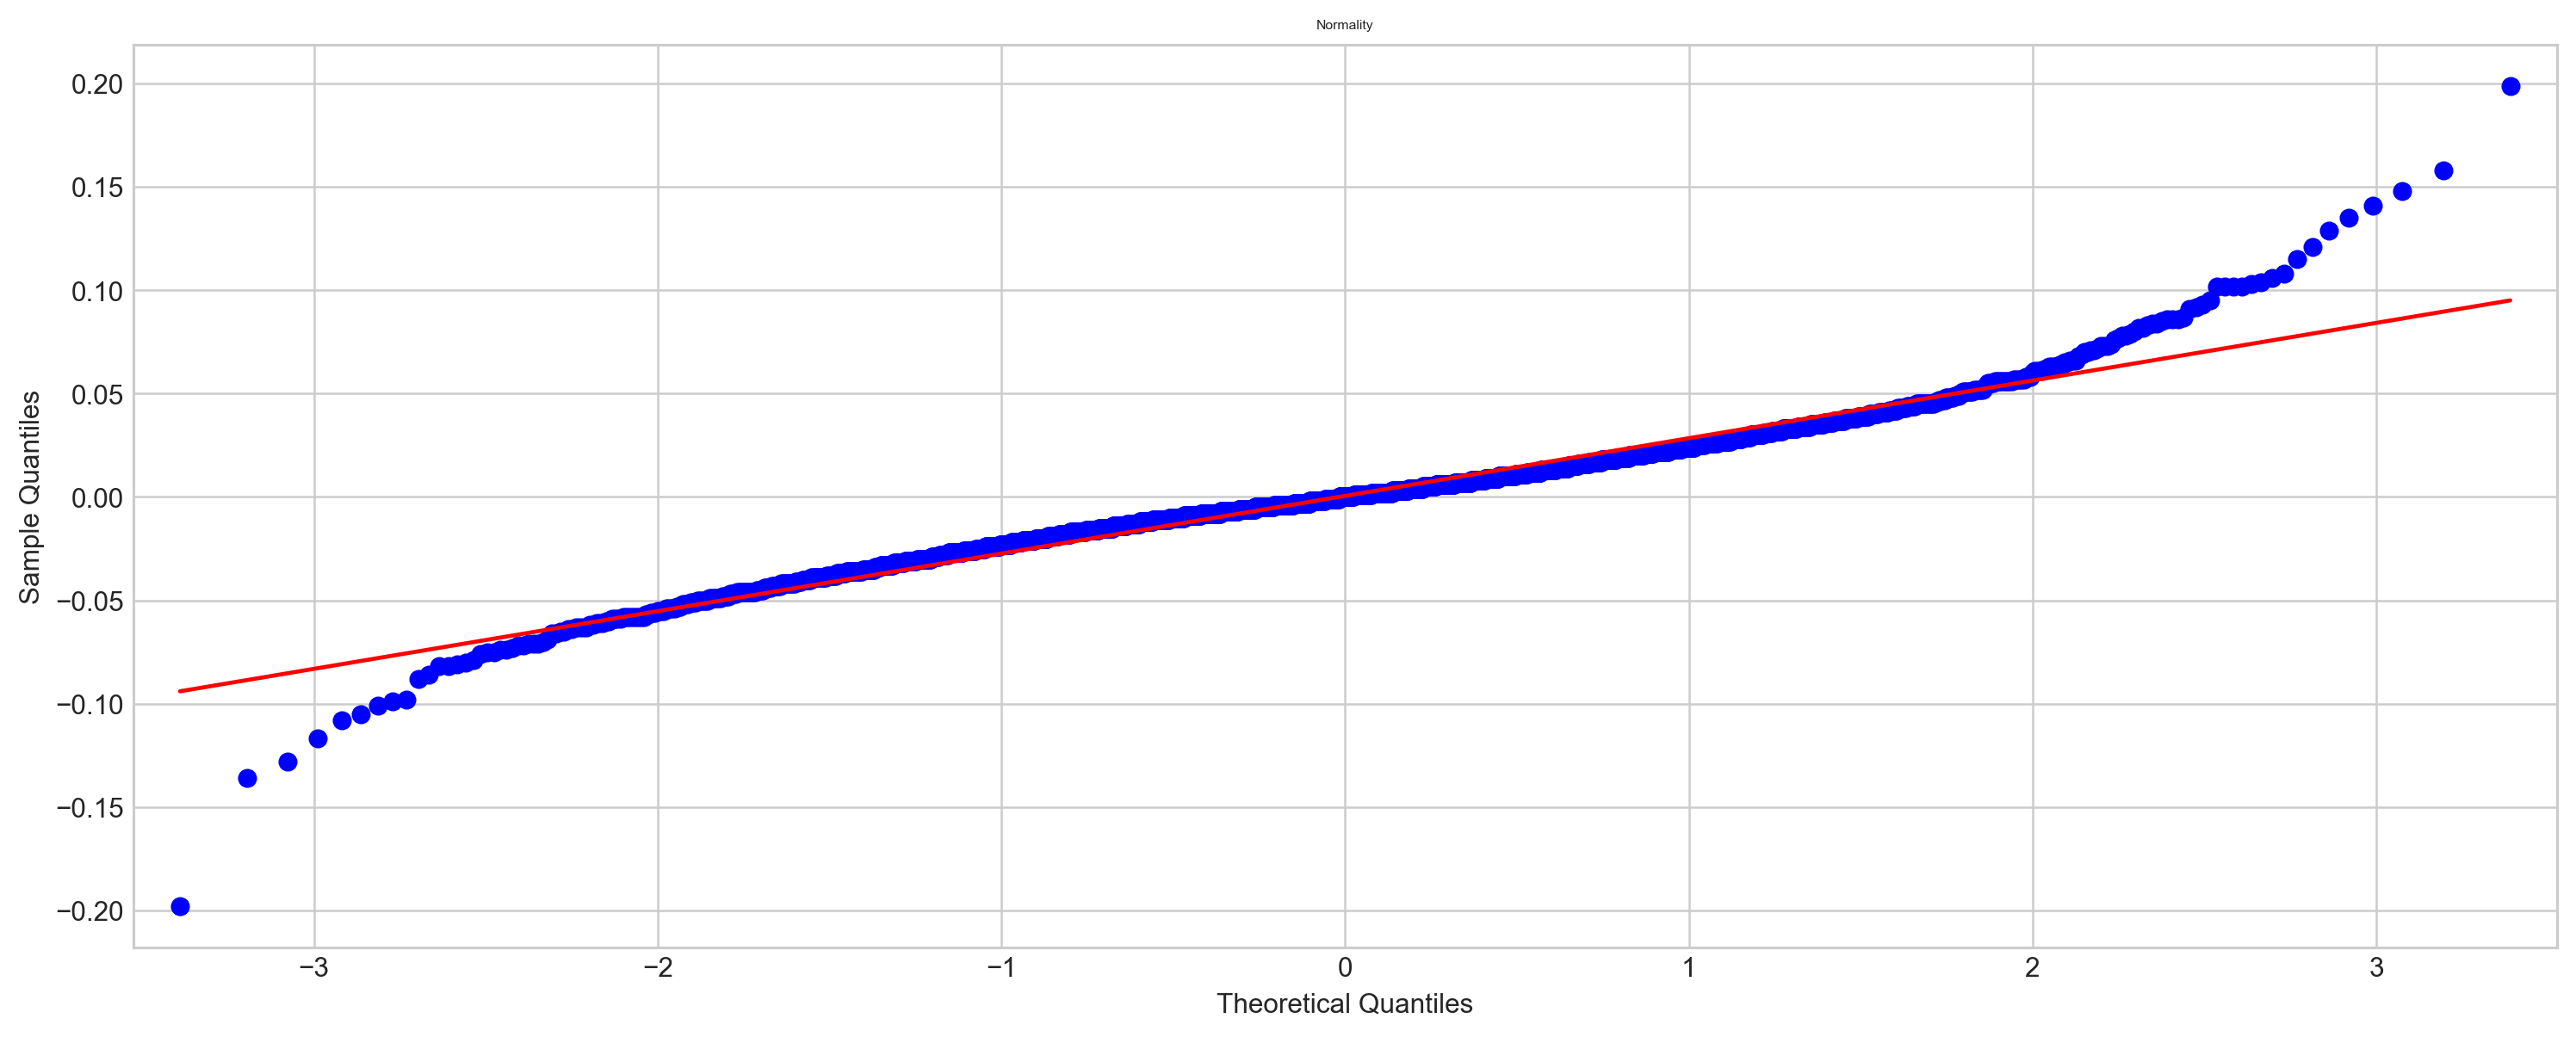

In [31]:
plt.figure(figsize=(16,6))
plt.rcParams['figure.dpi'] = 227
sm.qqplot(stocks['TSLA'].Return, line='s', scale=1)
plt.rcParams['figure.figsize'] = [16.0, 6.0]
plt.title('Normality', fontSize=5)
plt.show()

# Conclusion
1. Return has 64% correlation with Change feature.
2. Close value stays inside Bollinger Bands
3. Return feature mostly normal